Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import statsmodels.stats as stm
%matplotlib inline

Data Dictionary:

Sales_ID (Sales ID) 

name (Name of the used car) 

year (Year of the car purchase) 

selling_price (Current selling price for used car) 

km_driven (Total km driven) 

Region (Region where it is used) 

State or Province (State or Province where it is used)

City (City where it is used) 

fuel (Fuel type) 

seller_type (Who is selling the car) 

transmission (Transmission type of the car) 

owner (Owner type) 

mileage (Mileage of the car) 

engine (engine power) 

max_power (max power) 

seats (Number of seats) 

sold (used car sold or not)


Load Dataset

In [2]:
df=pd.read_csv('UsedCarsData.csv')
df['name'] = df.name.str.split().str.get(0)
df.head() 

Sales_ID     name  year  selling_price  km_driven   Region  \
0         1   Maruti  2014         450000     145500     East   
1         2    Skoda  2014         370000     120000     East   
2         3    Honda  2006         158000     140000  Central   
3         4  Hyundai  2010         225000     127000  Central   
4         5   Maruti  2007         130000     120000     East   

      State or Province           City    fuel seller_type transmission  \
0  District of Columbia     Washington  Diesel  Individual       Manual   
1              New York  New York City  Diesel  Individual       Manual   
2              Illinois        Chicago  Petrol  Individual       Manual   
3              Illinois        Chicago  Diesel  Individual       Manual   
4              New York  New York City  Petrol  Individual       Manual   

          owner     mileage   engine   max_power                    torque  \
0   First Owner   23.4 kmpl  1248 CC      74 bhp            190Nm@ 2000rpm   
1  Second Owner  21.14 kmpl  1498 CC  103.52 bhp       250Nm@ 1500-2500rpm   
2   Third Owner   17.7 kmpl  1497 CC      78 bhp     12.7@ 2,700(kgm@ rpm)   
3   First Owner   23.0 kmpl  1396 CC      90 bhp  22.4 kgm at 1750-2750rpm   
4   First Owner   16.1 kmpl  1298 CC    88.2 bhp     11.5@ 4,500(kgm@ rpm)   

   seats sold  
0      5    Y  
1      5    Y  
2      5    Y  
3      5    Y  
4      5    Y

In [3]:
df.columns  

Index(['Sales_ID', 'name', 'year', 'selling_price', 'km_driven', 'Region',
       'State or Province', 'City', 'fuel', 'seller_type', 'transmission',
       'owner', 'mileage', 'engine', 'max_power', 'torque', 'seats', 'sold'],
      dtype='object')

In [4]:
df.shape

(7906, 18)

In [5]:
df.isnull().sum()

Sales_ID             0
name                 0
year                 0
selling_price        0
km_driven            0
Region               0
State or Province    0
City                 0
fuel                 0
seller_type          0
transmission         0
owner                0
mileage              0
engine               0
max_power            0
torque               0
seats                0
sold                 0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
print(df.dtypes)

Sales_ID              int64
name                 object
year                  int64
selling_price         int64
km_driven             int64
Region               object
State or Province    object
City                 object
fuel                 object
seller_type          object
transmission         object
owner                object
mileage              object
engine               object
max_power            object
torque               object
seats                 int64
sold                 object
dtype: object


Converting columns into required datatypes

In [8]:
df['Sales_ID']=df['Sales_ID'].astype('object')
df['mileage'] = df['mileage'].str.replace("kmpl","")
df['mileage'] = df['mileage'].str.replace("km/kg","")
df['engine'] = df['engine'].str.replace("CC","")
df['max_power'] = df['max_power'].str.replace("bhp","")
df['max_power'] = df['max_power'].str.replace(" ","")

df['mileage']=pd.to_numeric(df['mileage'])
df['engine']=pd.to_numeric(df['engine'])
df['max_power']=pd.to_numeric(df['max_power'])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7906 entries, 0 to 7905
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Sales_ID           7906 non-null   object 
 1   name               7906 non-null   object 
 2   year               7906 non-null   int64  
 3   selling_price      7906 non-null   int64  
 4   km_driven          7906 non-null   int64  
 5   Region             7906 non-null   object 
 6   State or Province  7906 non-null   object 
 7   City               7906 non-null   object 
 8   fuel               7906 non-null   object 
 9   seller_type        7906 non-null   object 
 10  transmission       7906 non-null   object 
 11  owner              7906 non-null   object 
 12  mileage            7906 non-null   float64
 13  engine             7906 non-null   int64  
 14  max_power          7906 non-null   float64
 15  torque             7906 non-null   object 
 16  seats              7906 

In [10]:
df.describe()

year  selling_price     km_driven      mileage       engine  \
count  7906.000000   7.906000e+03  7.906000e+03  7906.000000  7906.000000   
mean   2013.983936   6.498137e+05  6.918866e+04    19.419861  1458.708829   
std       3.863695   8.135827e+05  5.679230e+04     4.036263   503.893057   
min    1994.000000   2.999900e+04  1.000000e+00     0.000000   624.000000   
25%    2012.000000   2.700000e+05  3.500000e+04    16.780000  1197.000000   
50%    2015.000000   4.500000e+05  6.000000e+04    19.300000  1248.000000   
75%    2017.000000   6.900000e+05  9.542500e+04    22.320000  1582.000000   
max    2020.000000   1.000000e+07  2.360457e+06    42.000000  3604.000000   

         max_power        seats  
count  7906.000000  7906.000000  
mean     91.587374     5.416393  
std      35.747216     0.959208  
min      32.800000     2.000000  
25%      68.050000     5.000000  
50%      82.000000     5.000000  
75%     102.000000     5.000000  
max     400.000000    14.000000

In [11]:
numeric= df[['selling_price', 'km_driven', 'mileage', 'engine', 'max_power', 'torque', 'seats']]
numeric.corr()


selling_price  km_driven   mileage    engine  max_power  \
selling_price       1.000000  -0.222158 -0.126280  0.455682   0.749674   
km_driven          -0.222158   1.000000 -0.172980  0.206031  -0.038159   
mileage            -0.126280  -0.172980  1.000000 -0.576408  -0.374621   
engine              0.455682   0.206031 -0.576408  1.000000   0.703975   
max_power           0.749674  -0.038159 -0.374621  0.703975   1.000000   
seats               0.041617   0.227259 -0.451700  0.611103   0.191999   

                  seats  
selling_price  0.041617  
km_driven      0.227259  
mileage       -0.451700  
engine         0.611103  
max_power      0.191999  
seats          1.000000

Inferences:

1.There are 7906 rows and 18 columns in the dataset.

2.Most of the variables are categorical in nature with 'selling_price', 'km_driven', 'mileage', 'engine' and 'max_power' columns as numerical.

3.The main features and target of the dataset is the 'sold' and 'selling_price' column which tells us whether a used car is sold or not and its selling price respectively.

# Univariate Analysis

## Distribution of Cars Sold or Not Sold

In [12]:
df['sold'].value_counts()

N    5906
Y    2000
Name: sold, dtype: int64

<AxesSubplot:xlabel='sold', ylabel='count'>

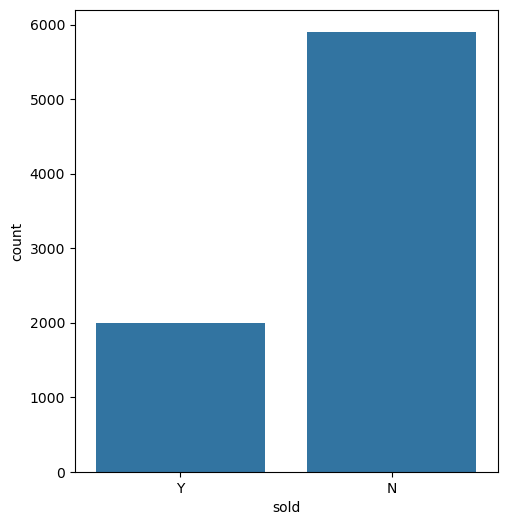

In [13]:
base_color=sns.color_palette()[0]
plt.figure(figsize=[12,6])
plt.subplot(1,2,1)
sns.countplot(data=df, x='sold',color=base_color)

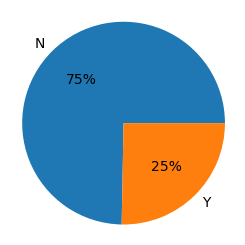

In [14]:
plt.subplot(1,2,2)
sold_count=df.sold.value_counts(normalize=True)
plt.pie(sold_count,labels=sold_count.index ,autopct='%.0f%%');
plt.axis('square');

Inferences:

1.75% of the cars in the dataset have not been sold with only 25% sold.

## Distribution of selling price

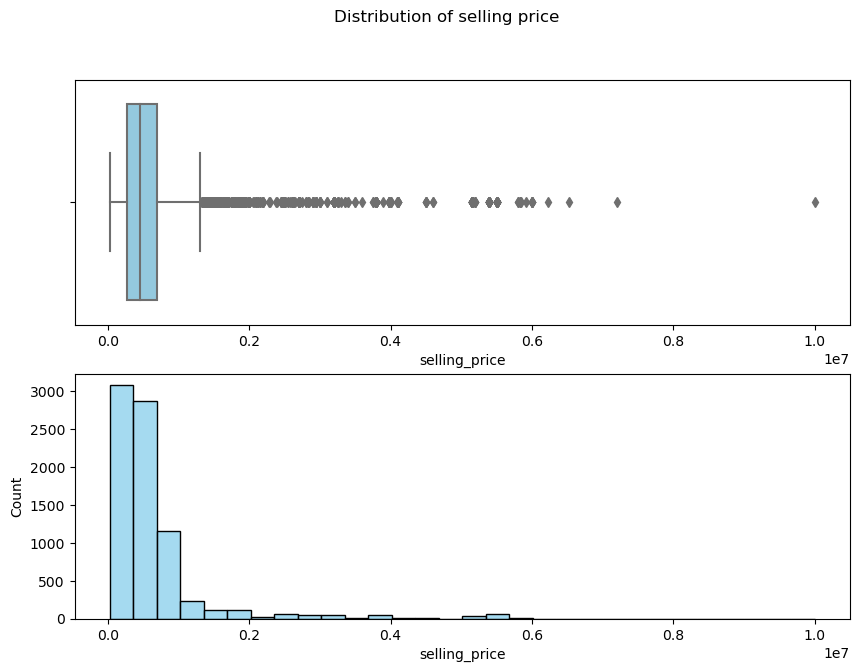

In [15]:
fig,ax=plt.subplots(nrows=2,figsize=[10,7])
sns.boxplot(data=df,x='selling_price',ax=ax[0],color='skyblue')
sns.histplot(data=df, x='selling_price',bins=30,ax=ax[1],color='skyblue')
plt.suptitle('Distribution of selling price ');

Inferences:

The distribution shows a lot of outliers in the selling_price column which needs to be treated before proceeding.

In [16]:
df['selling_price'].describe()

count    7.906000e+03
mean     6.498137e+05
std      8.135827e+05
min      2.999900e+04
25%      2.700000e+05
50%      4.500000e+05
75%      6.900000e+05
max      1.000000e+07
Name: selling_price, dtype: float64

## Removing outliers in the selling_price column

In [17]:
Q1 = df['selling_price'].quantile(0.25)
Q3 = df['selling_price'].quantile(0.75)
IQR = Q3 - Q1

df = df[~((df['selling_price'] < (Q1 - 1.5 * IQR)) |(df['selling_price']> (Q3 + 1.5 * IQR)))]

In [18]:
df.shape

(7308, 18)

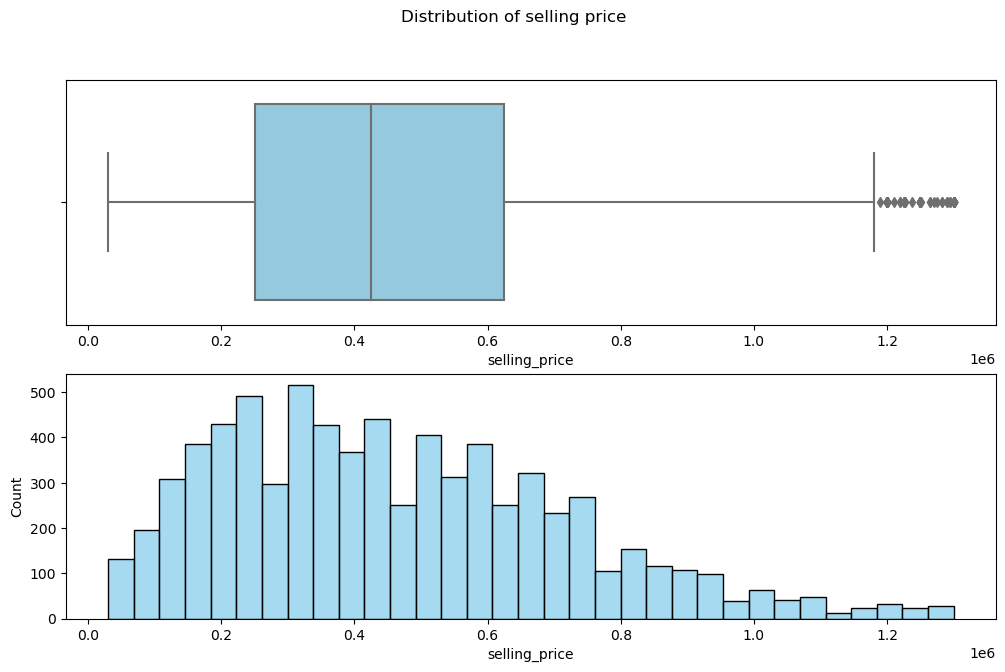

In [19]:
fig,ax=plt.subplots(nrows=2,figsize=[12,7])
sns.boxplot(data=df,x='selling_price',ax=ax[0],color='skyblue')
sns.histplot(data=df, x='selling_price',ax=ax[1],color='skyblue')
plt.suptitle('Distribution of selling price ');

## Exploring the categorical features

In [20]:
df['Region'].value_counts()

Central    2206
West       1834
East       1804
South      1464
Name: Region, dtype: int64

<AxesSubplot:xlabel='Region', ylabel='Count'>

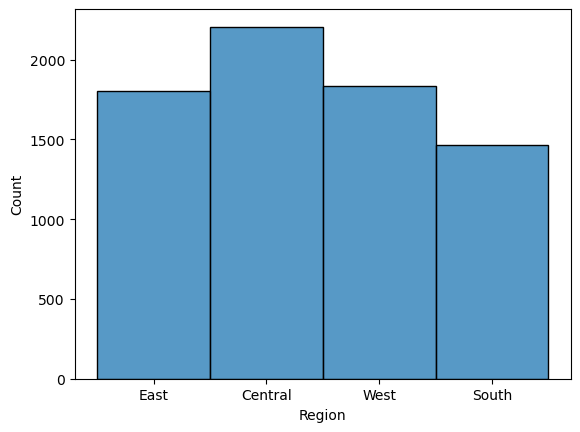

In [21]:
sns.histplot(x="Region",data=df)

In [22]:
df['fuel'].value_counts()

Diesel    3817
Petrol    3404
CNG         52
LPG         35
Name: fuel, dtype: int64

<AxesSubplot:xlabel='fuel', ylabel='Count'>

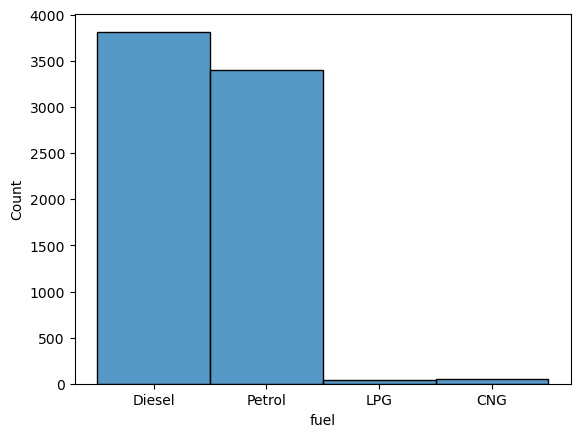

In [23]:
sns.histplot(x="fuel",data=df)

In [24]:
df['seller_type'].value_counts()

Individual          6330
Dealer               774
Trustmark Dealer     204
Name: seller_type, dtype: int64

<AxesSubplot:xlabel='seller_type', ylabel='Count'>

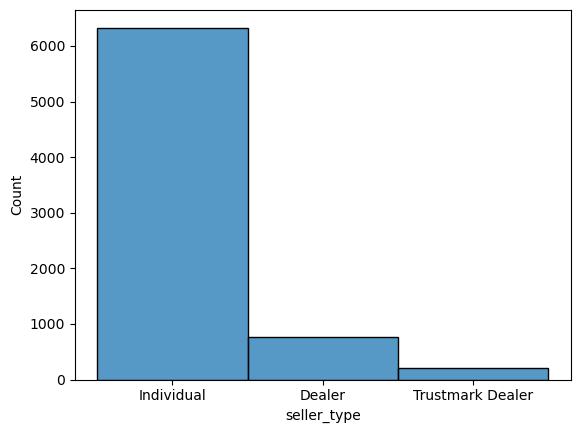

In [25]:
sns.histplot(x="seller_type",data=df)

In [26]:
df['transmission'].value_counts()

Manual       6745
Automatic     563
Name: transmission, dtype: int64

<AxesSubplot:xlabel='transmission', ylabel='Count'>

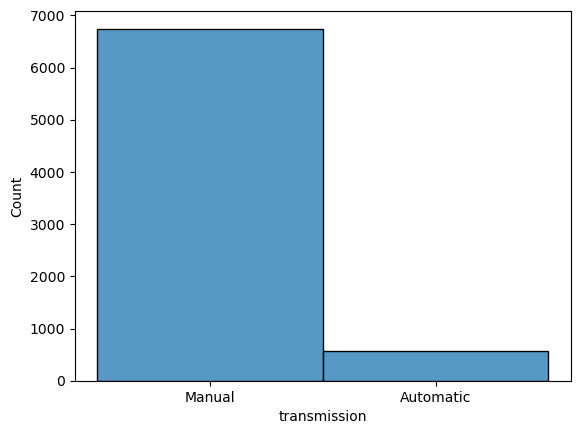

In [27]:
sns.histplot(x="transmission",data=df)

In [28]:
df['owner'].value_counts()

First Owner             4674
Second Owner            1967
Third Owner              507
Fourth & Above Owner     160
Name: owner, dtype: int64

<AxesSubplot:xlabel='owner', ylabel='Count'>

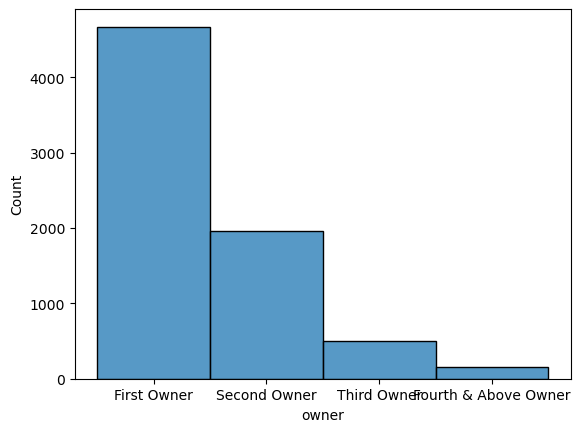

In [29]:
sns.histplot(x="owner",data=df)

<AxesSubplot:xlabel='seats', ylabel='Count'>

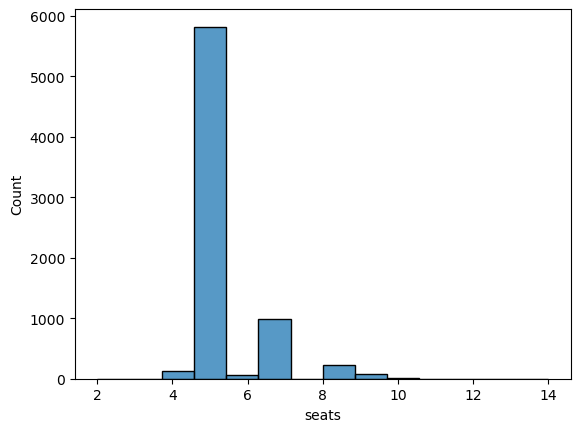

In [30]:
sns.histplot(x="seats",data=df)

Inferences:

1. The dataset seems to contain more Central Region cars.

2. Higher amount of Diesel and Petrol operated cars as compared to LPG and CNG.

3. Sellers that are mostly individuals , more manually operated cars than automatic cars , most first owner cars and a lot of 5 seater cars.

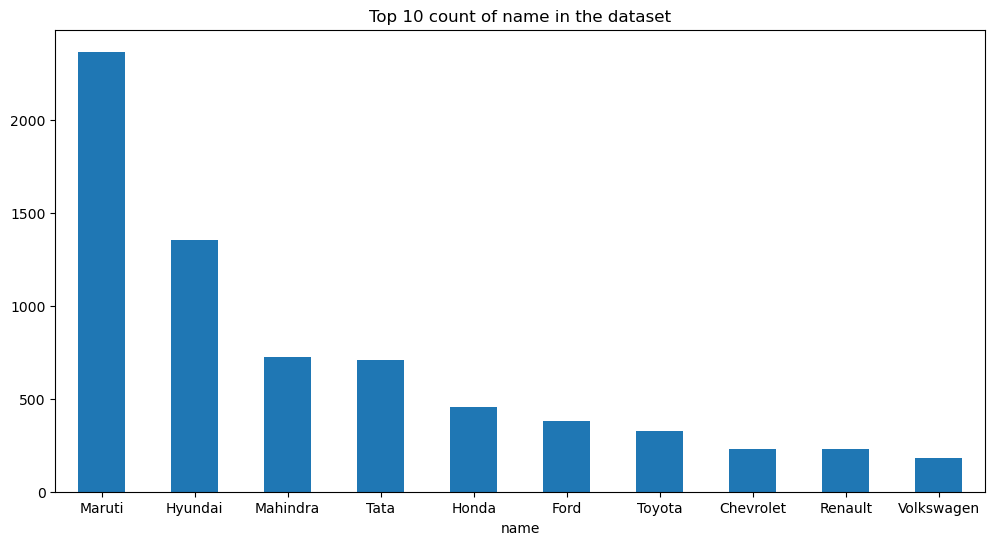

In [31]:
plt.figure(figsize=[12,6])
d_t=df['name'].value_counts().head(10)
d_t.plot(kind='bar')

plt.xlabel(f'name')
plt.xticks(rotation=0)
plt.title(f"Top 10 count of name in the dataset")

plt.show()

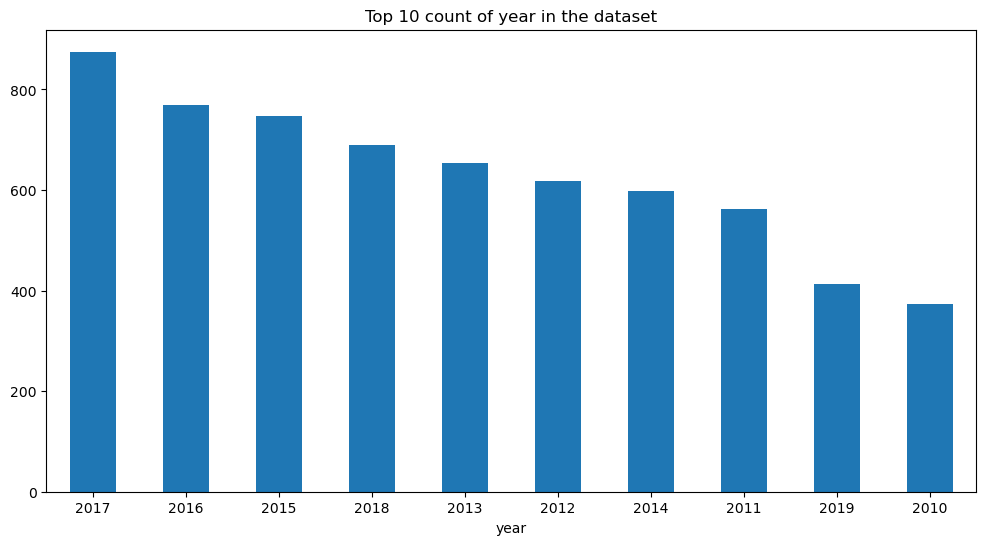

In [32]:
plt.figure(figsize=[12,6])
d=df['year'].value_counts().head(10)
d.plot(kind='bar')

plt.xlabel(f'year')
plt.xticks(rotation=0)
plt.title(f"Top 10 count of year in the dataset")

plt.show()

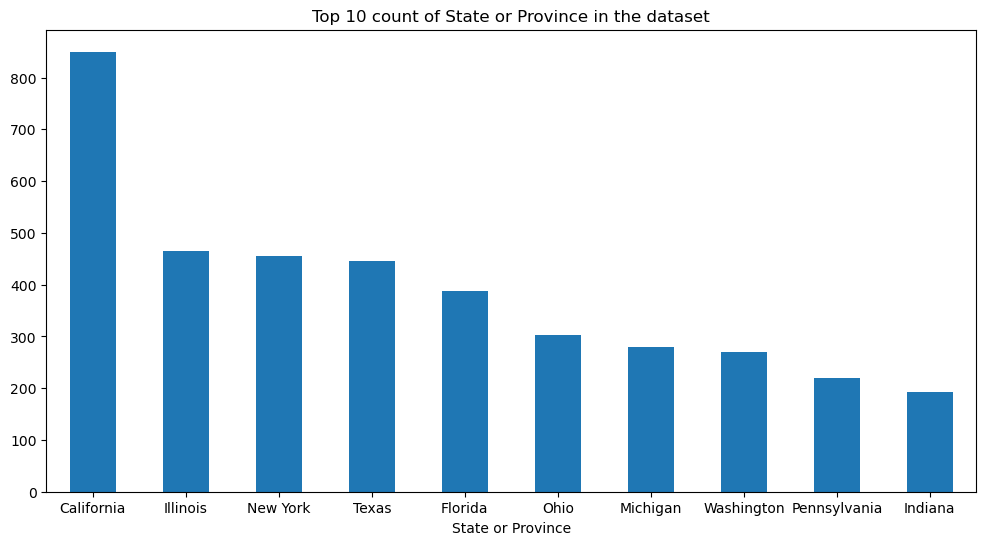

In [33]:
plt.figure(figsize=[12,6])
d=df['State or Province'].value_counts().head(10)
d.plot(kind='bar')

plt.xlabel(f'State or Province')
plt.xticks(rotation=0)
plt.title(f"Top 10 count of State or Province in the dataset")

plt.show()

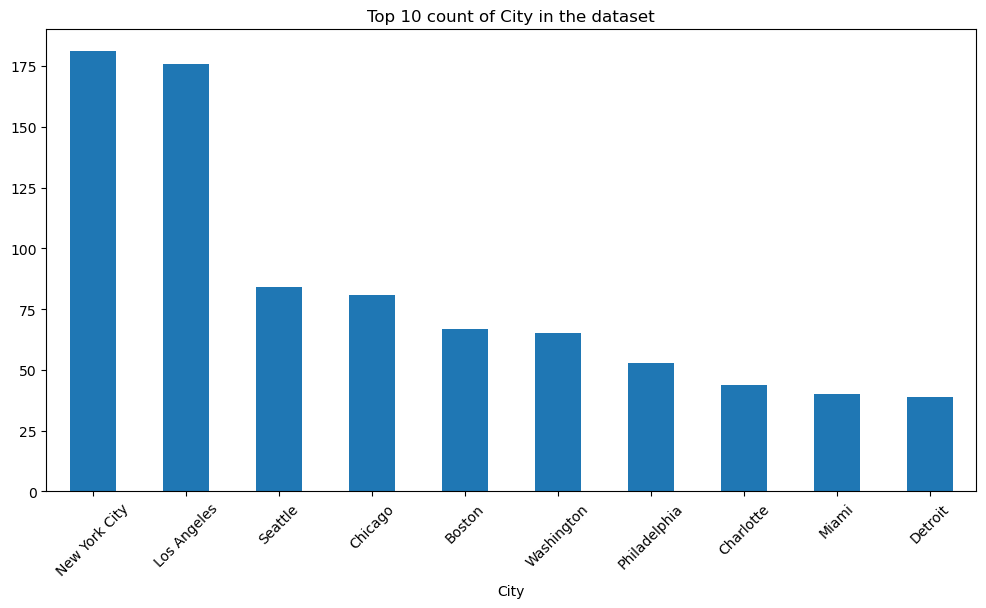

In [34]:
plt.figure(figsize=[12,6])
d=df['City'].value_counts().head(10)
d.plot(kind='bar')

plt.xlabel(f'City')
plt.xticks(rotation=45)
plt.title(f"Top 10 count of City in the dataset")

plt.show()

Inferences:

1. Maruti,Hyundai,Mahindra,Tata and Honda are our top 5 name counts in the dataset. 
2. 2017,2016, 2015 and 2018 seems to be the year with the highest number of car purchases in the dataset.
3. Carlifornia,Illinois,New York and Texas are the states where most of the cars are used. 
4. NewYork City,Los Angeles,Seattle and Chicago are the citys where most of the cars are used.

## Exploring the numerical features

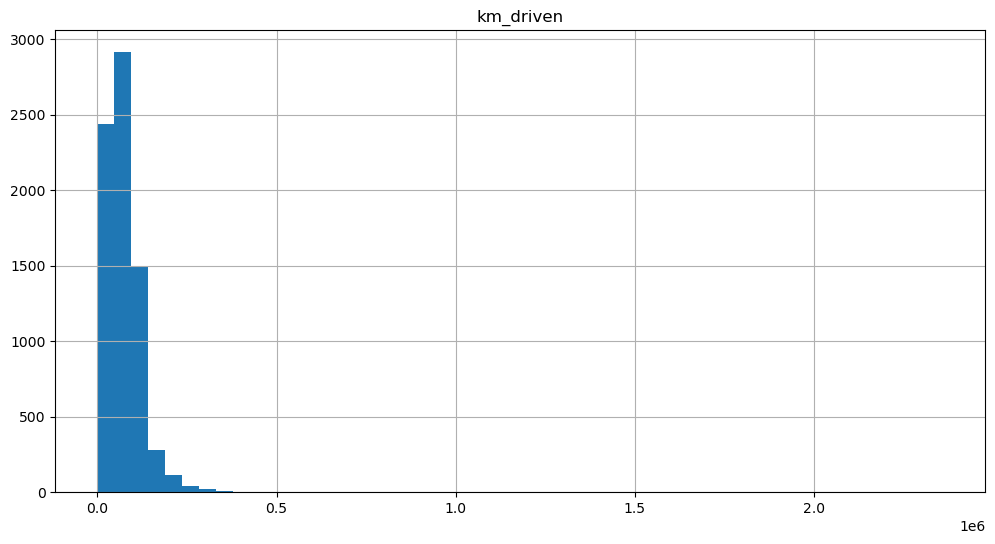

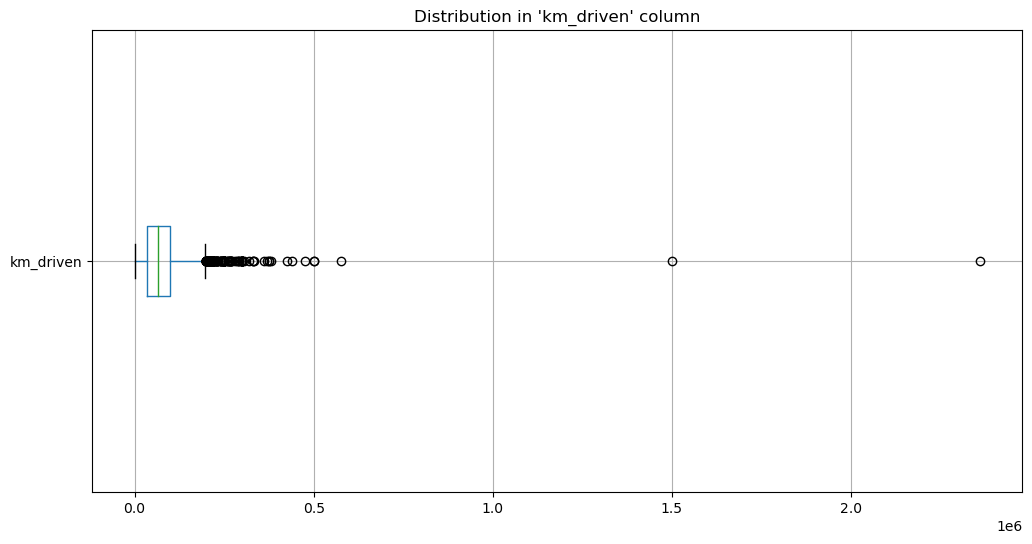

In [35]:
df.hist(column='km_driven',figsize=[12,6],bins=50)

plt.figure(figsize=[12,6])
df.boxplot(column='km_driven',vert=False)
plt.title(f"Distribution in 'km_driven' column")
  
plt.show()

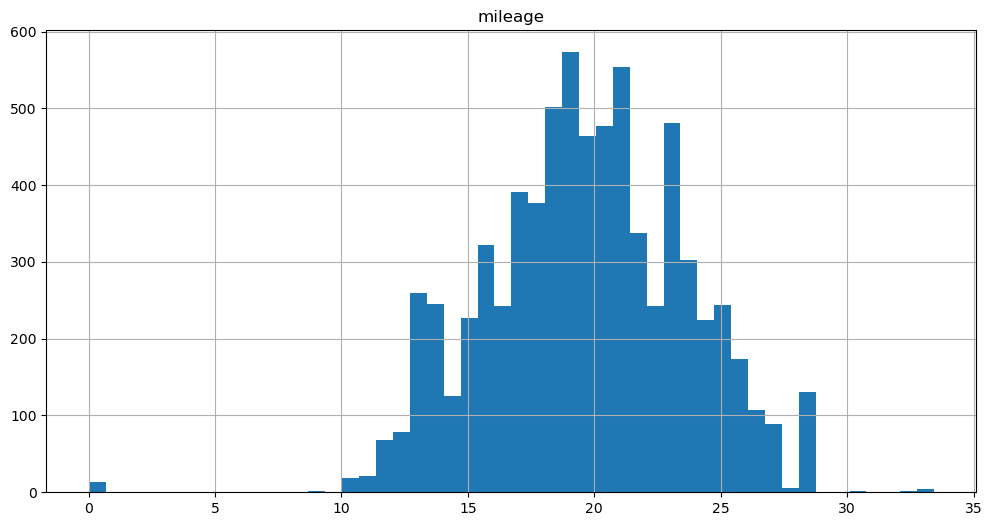

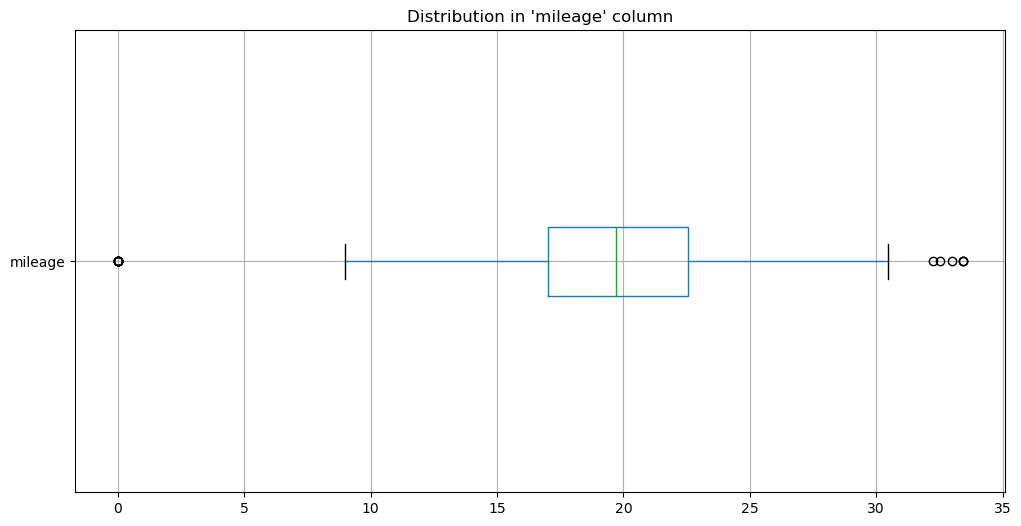

In [36]:
df.hist(column='mileage',figsize=[12,6],bins=50)

plt.figure(figsize=[12,6])
df.boxplot(column='mileage',vert=False)
plt.title(f"Distribution in 'mileage' column")
  
plt.show()

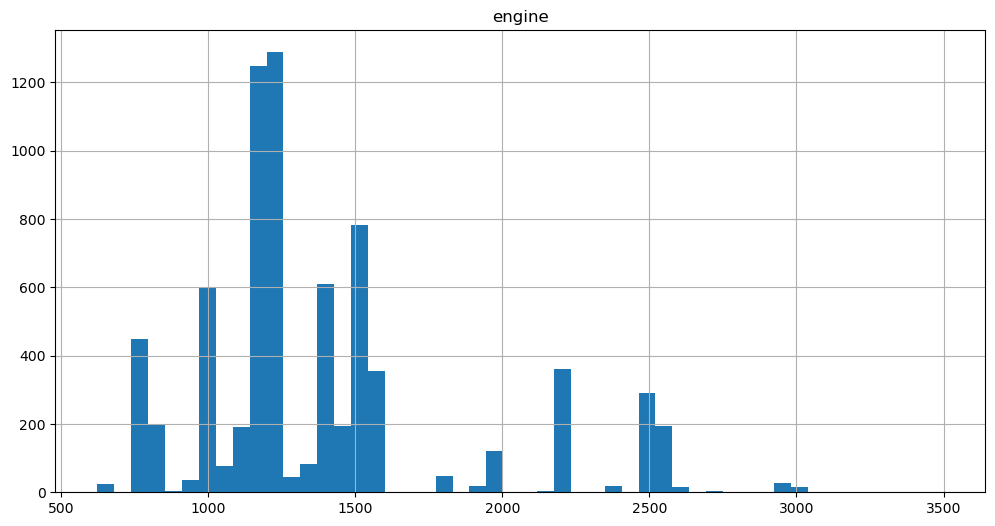

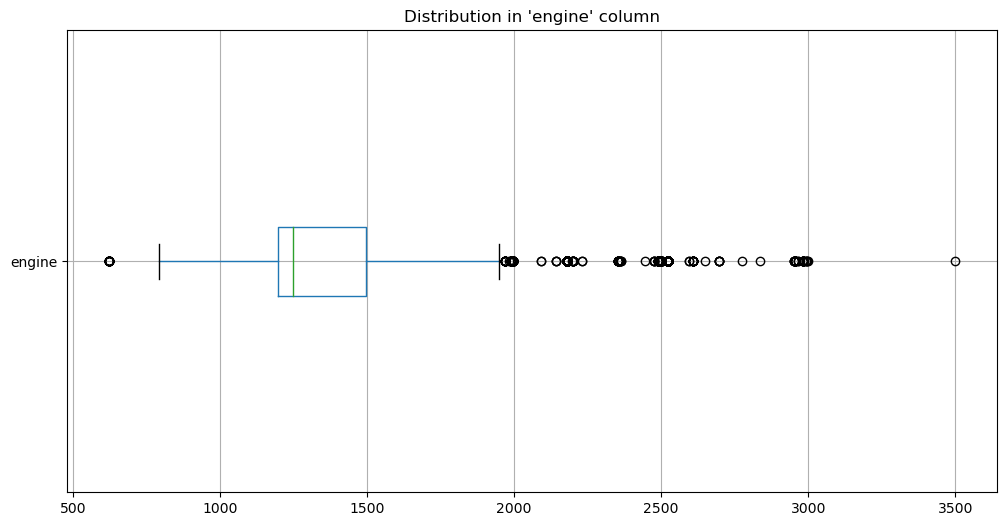

In [37]:
df.hist(column='engine',figsize=[12,6],bins=50)

plt.figure(figsize=[12,6])
df.boxplot(column='engine',vert=False)
plt.title(f"Distribution in 'engine' column")
  
plt.show()

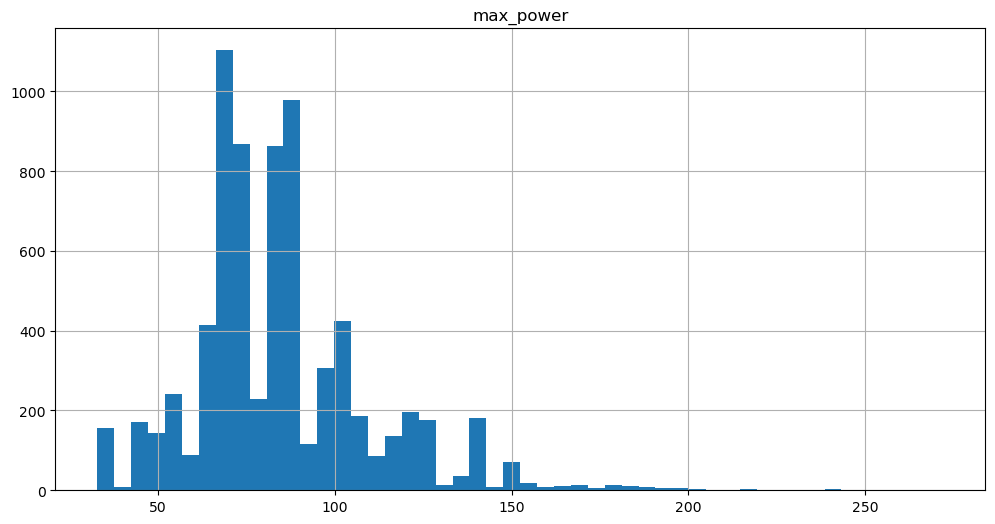

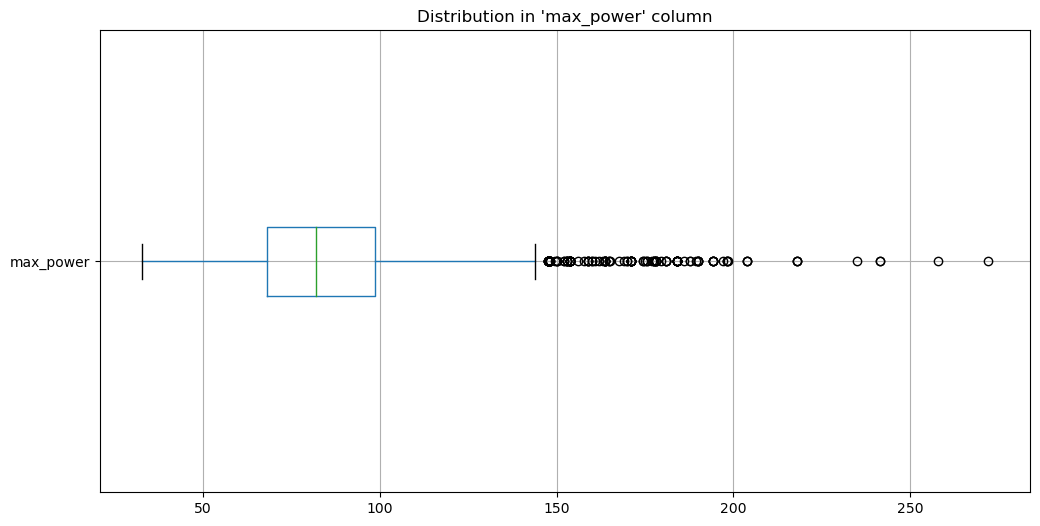

In [38]:
df.hist(column='max_power',figsize=[12,6],bins=50)

plt.figure(figsize=[12,6])
df.boxplot(column='max_power',vert=False)
plt.title(f"Distribution in 'max_power' column")
  
plt.show()

Inferences: 
    
1. The numerical variables happen to have most of its distributions rightly skewed which shows a lot of outliers.

In [39]:
Q1_km = df['km_driven'].quantile(0.25)
Q3_km = df['km_driven'].quantile(0.75)
IQR_km = Q3_km - Q1_km

df = df[~((df['km_driven'] < (Q1_km - 1.5 * IQR_km)) |(df['km_driven']> (Q3_km + 1.5 * IQR_km)))]

In [40]:
Q1_mil = df['mileage'].quantile(0.25)
Q3_mil = df['mileage'].quantile(0.75)
IQR_mil = Q3_mil - Q1_mil

df = df[~((df['mileage'] < (Q1_mil - 1.5 * IQR_mil)) |(df['mileage']> (Q3_mil + 1.5 * IQR_mil)))]

In [41]:
Q1_eng = df['engine'].quantile(0.25)
Q3_eng = df['engine'].quantile(0.75)
IQR_eng = Q3_eng - Q1_eng

df = df[~((df['engine'] < (Q1_eng - 1.5 * IQR_eng)) |(df['engine']> (Q3_eng + 1.5 * IQR_eng)))]

In [42]:
Q1_mp = df['max_power'].quantile(0.25)
Q3_mp = df['max_power'].quantile(0.75)
IQR_mp = Q3_mp - Q1_mp

df = df[~((df['max_power'] < (Q1_mp - 1.5 * IQR_mp)) |(df['max_power']> (Q3_mp + 1.5 * IQR_mp)))]

In [43]:
df.shape

(5877, 18)

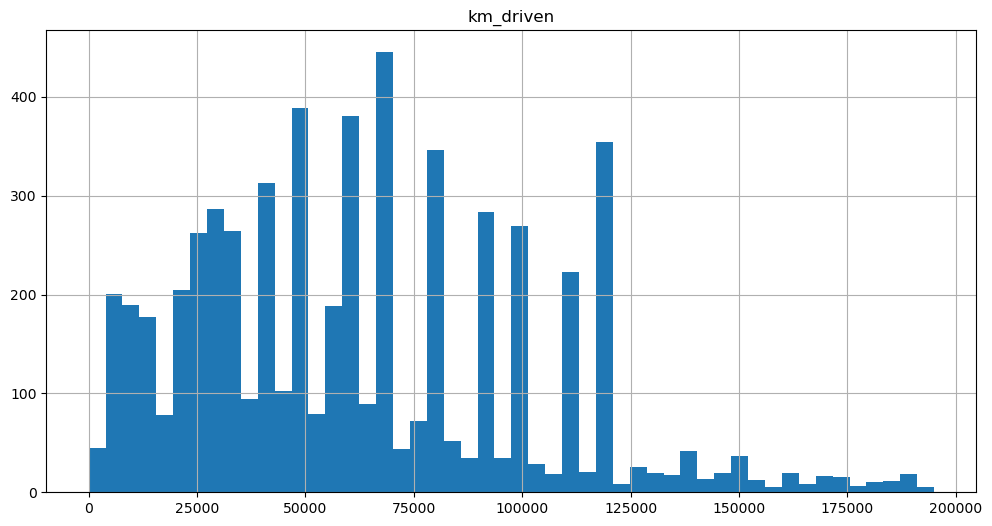

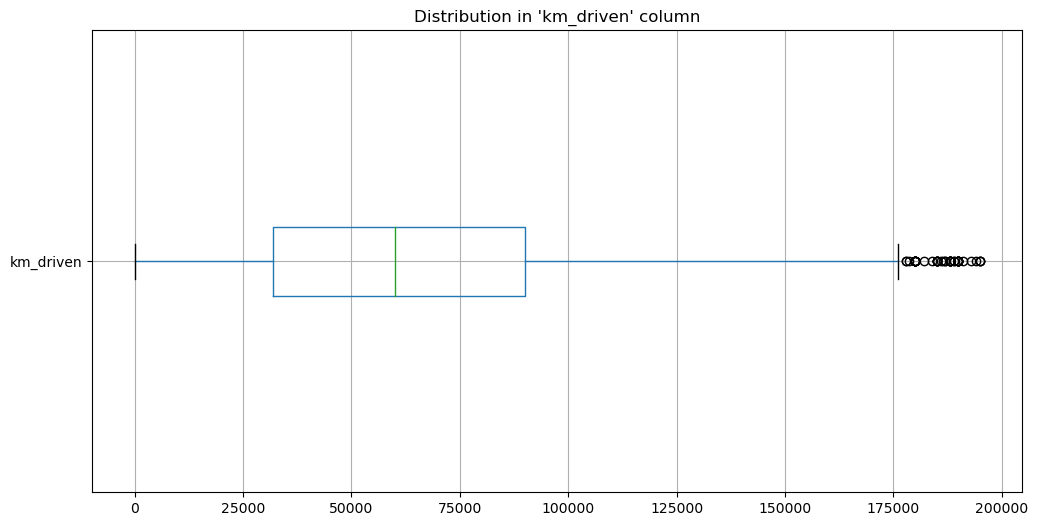

In [44]:
df.hist(column='km_driven',figsize=[12,6],bins=50)

plt.figure(figsize=[12,6])
df.boxplot(column='km_driven',vert=False)
plt.title(f"Distribution in 'km_driven' column")
  
plt.show()

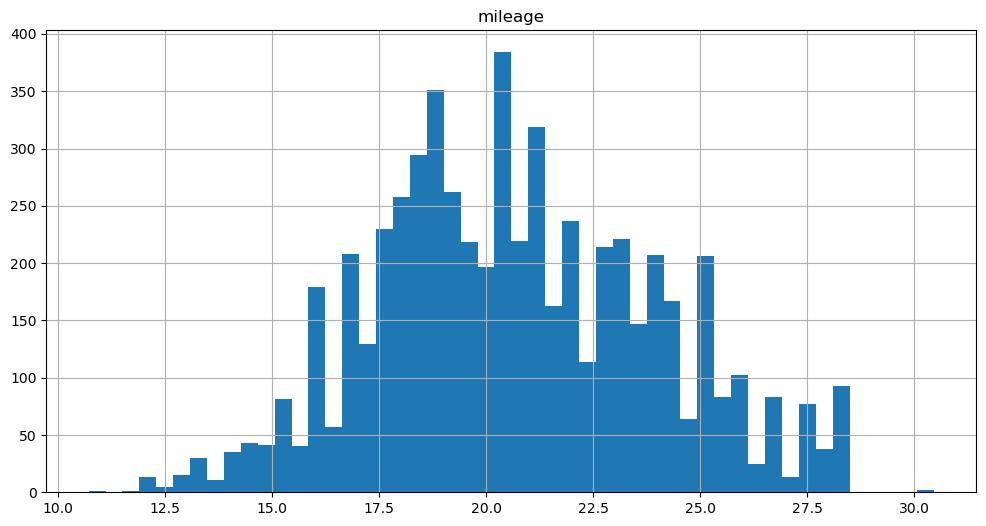

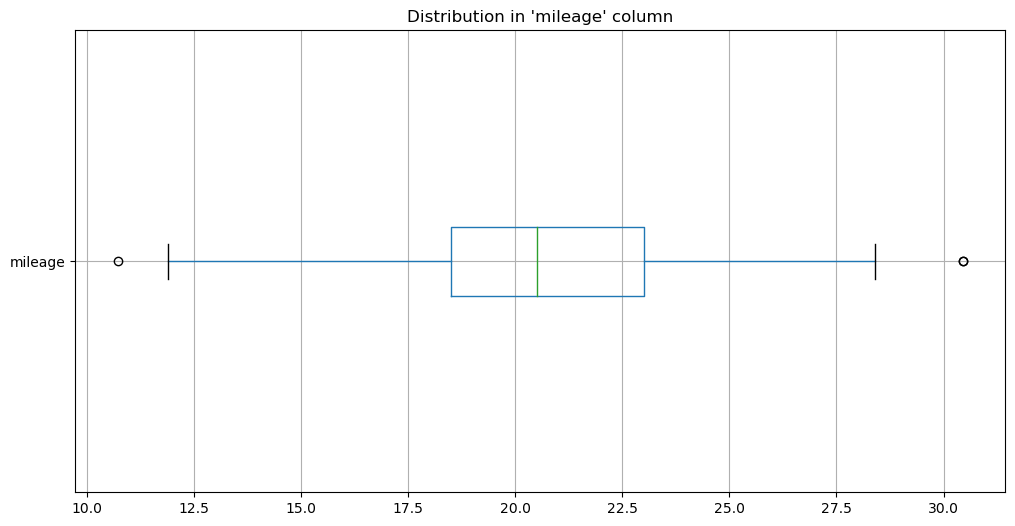

In [45]:
df.hist(column='mileage',figsize=[12,6],bins=50)

plt.figure(figsize=[12,6])
df.boxplot(column='mileage',vert=False)
plt.title(f"Distribution in 'mileage' column")
  
plt.show()


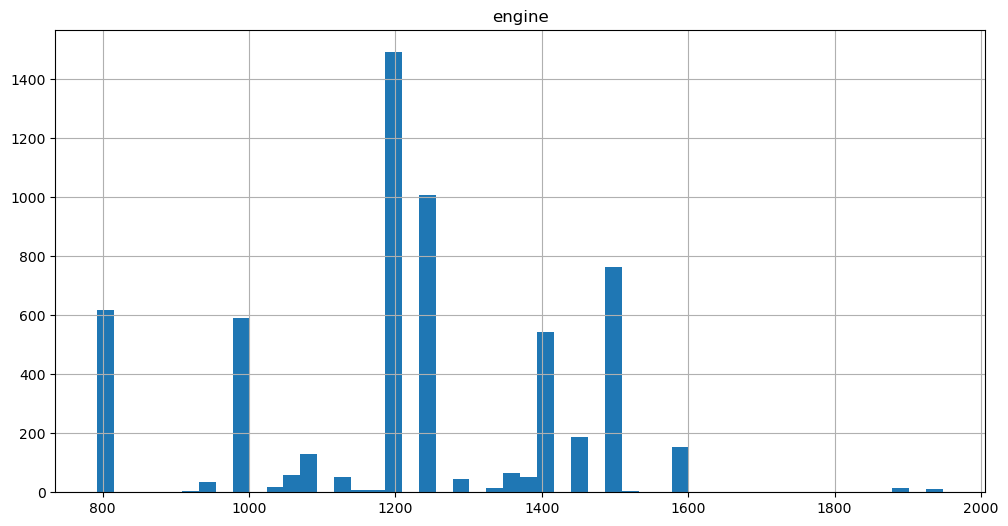

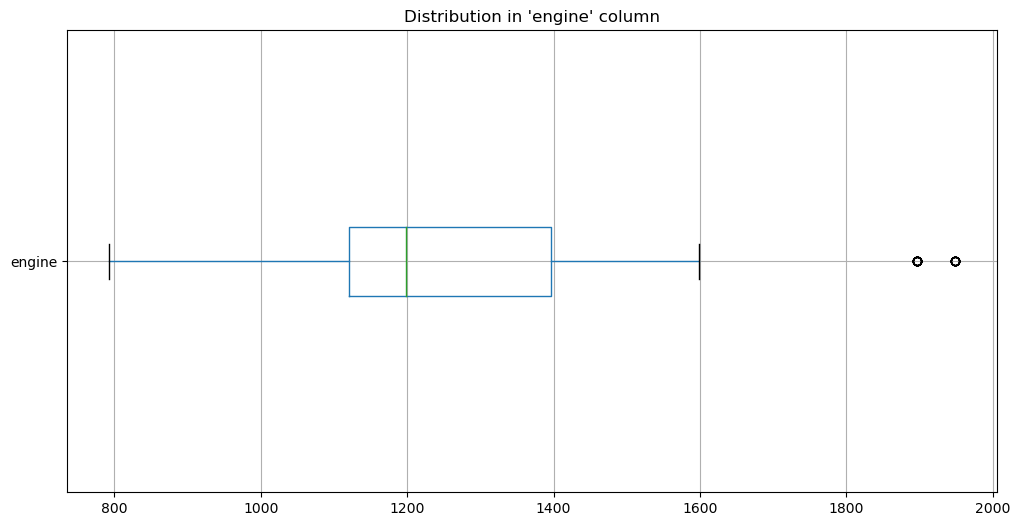

In [46]:
df.hist(column='engine',figsize=[12,6],bins=50)

plt.figure(figsize=[12,6])
df.boxplot(column='engine',vert=False)
plt.title(f"Distribution in 'engine' column")
  
plt.show()

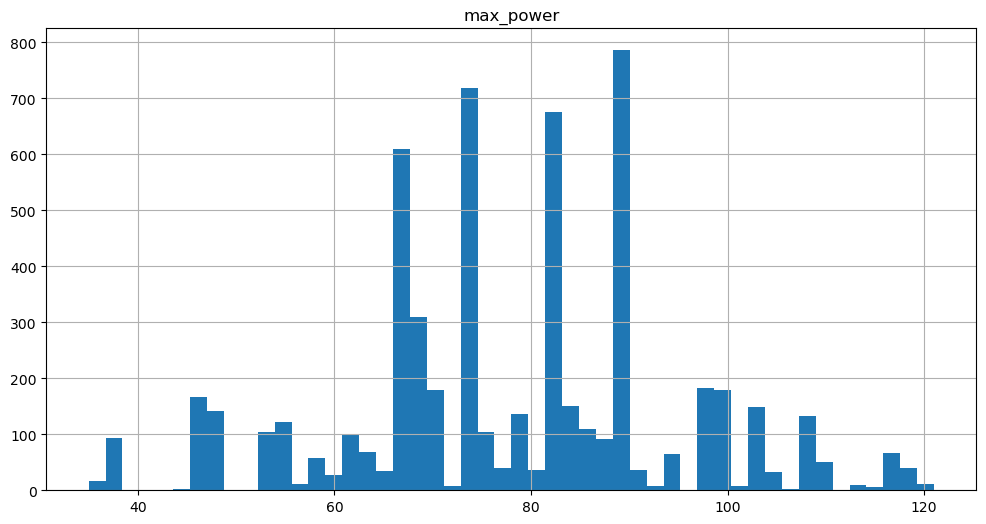

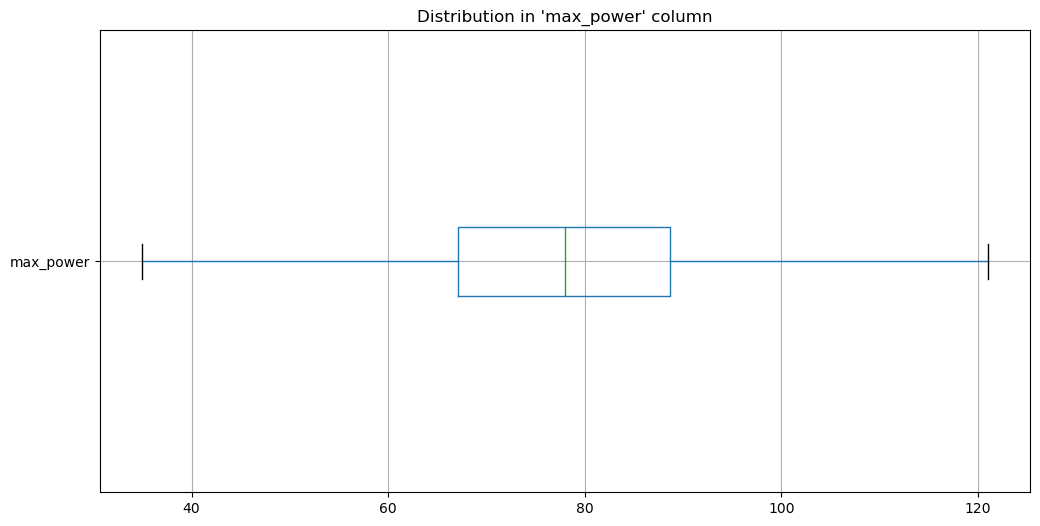

In [47]:
df.hist(column='max_power',figsize=[12,6],bins=50)

plt.figure(figsize=[12,6])
df.boxplot(column='max_power',vert=False)
plt.title(f"Distribution in 'max_power' column")
  
plt.show()

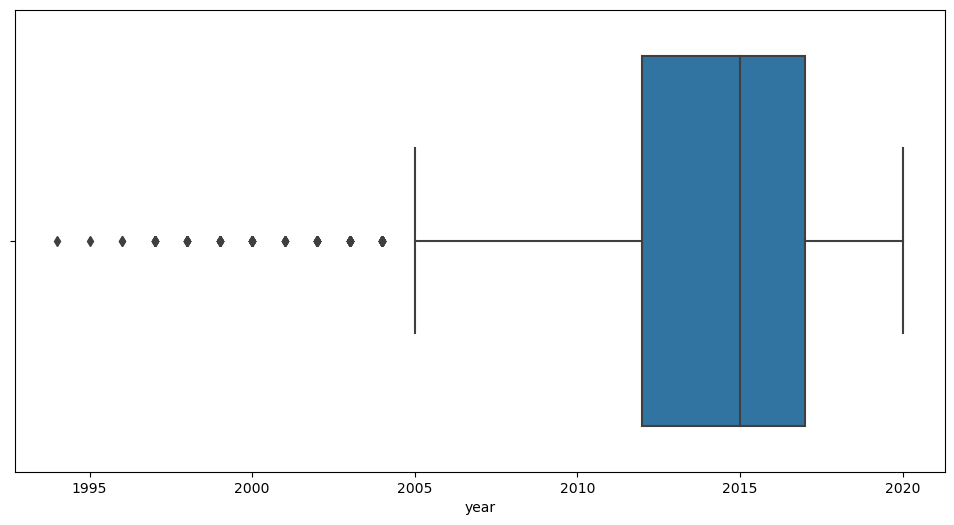

In [48]:
plt.figure(figsize=[12,6])
sns.boxplot(data=df,x='year');

Inferences:

1. The numerical variables showed interesting distributions with most of them rightly skewed. To adjust these numerical varaiables, Inter Quartile Range and conditionals has been used to remove outliers.

2. The selling price column was transformed with the use of Inter Quartile Range and conditionals to remove outliers.

## Bivariate Exploration

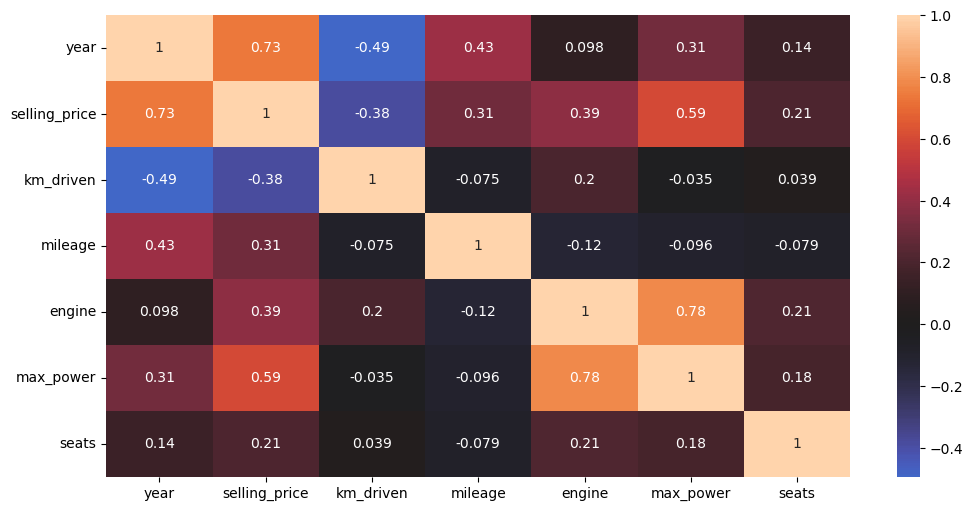

In [49]:
plt.figure(figsize = [12, 6])
sns.heatmap(df.corr(),annot=True,center=0);

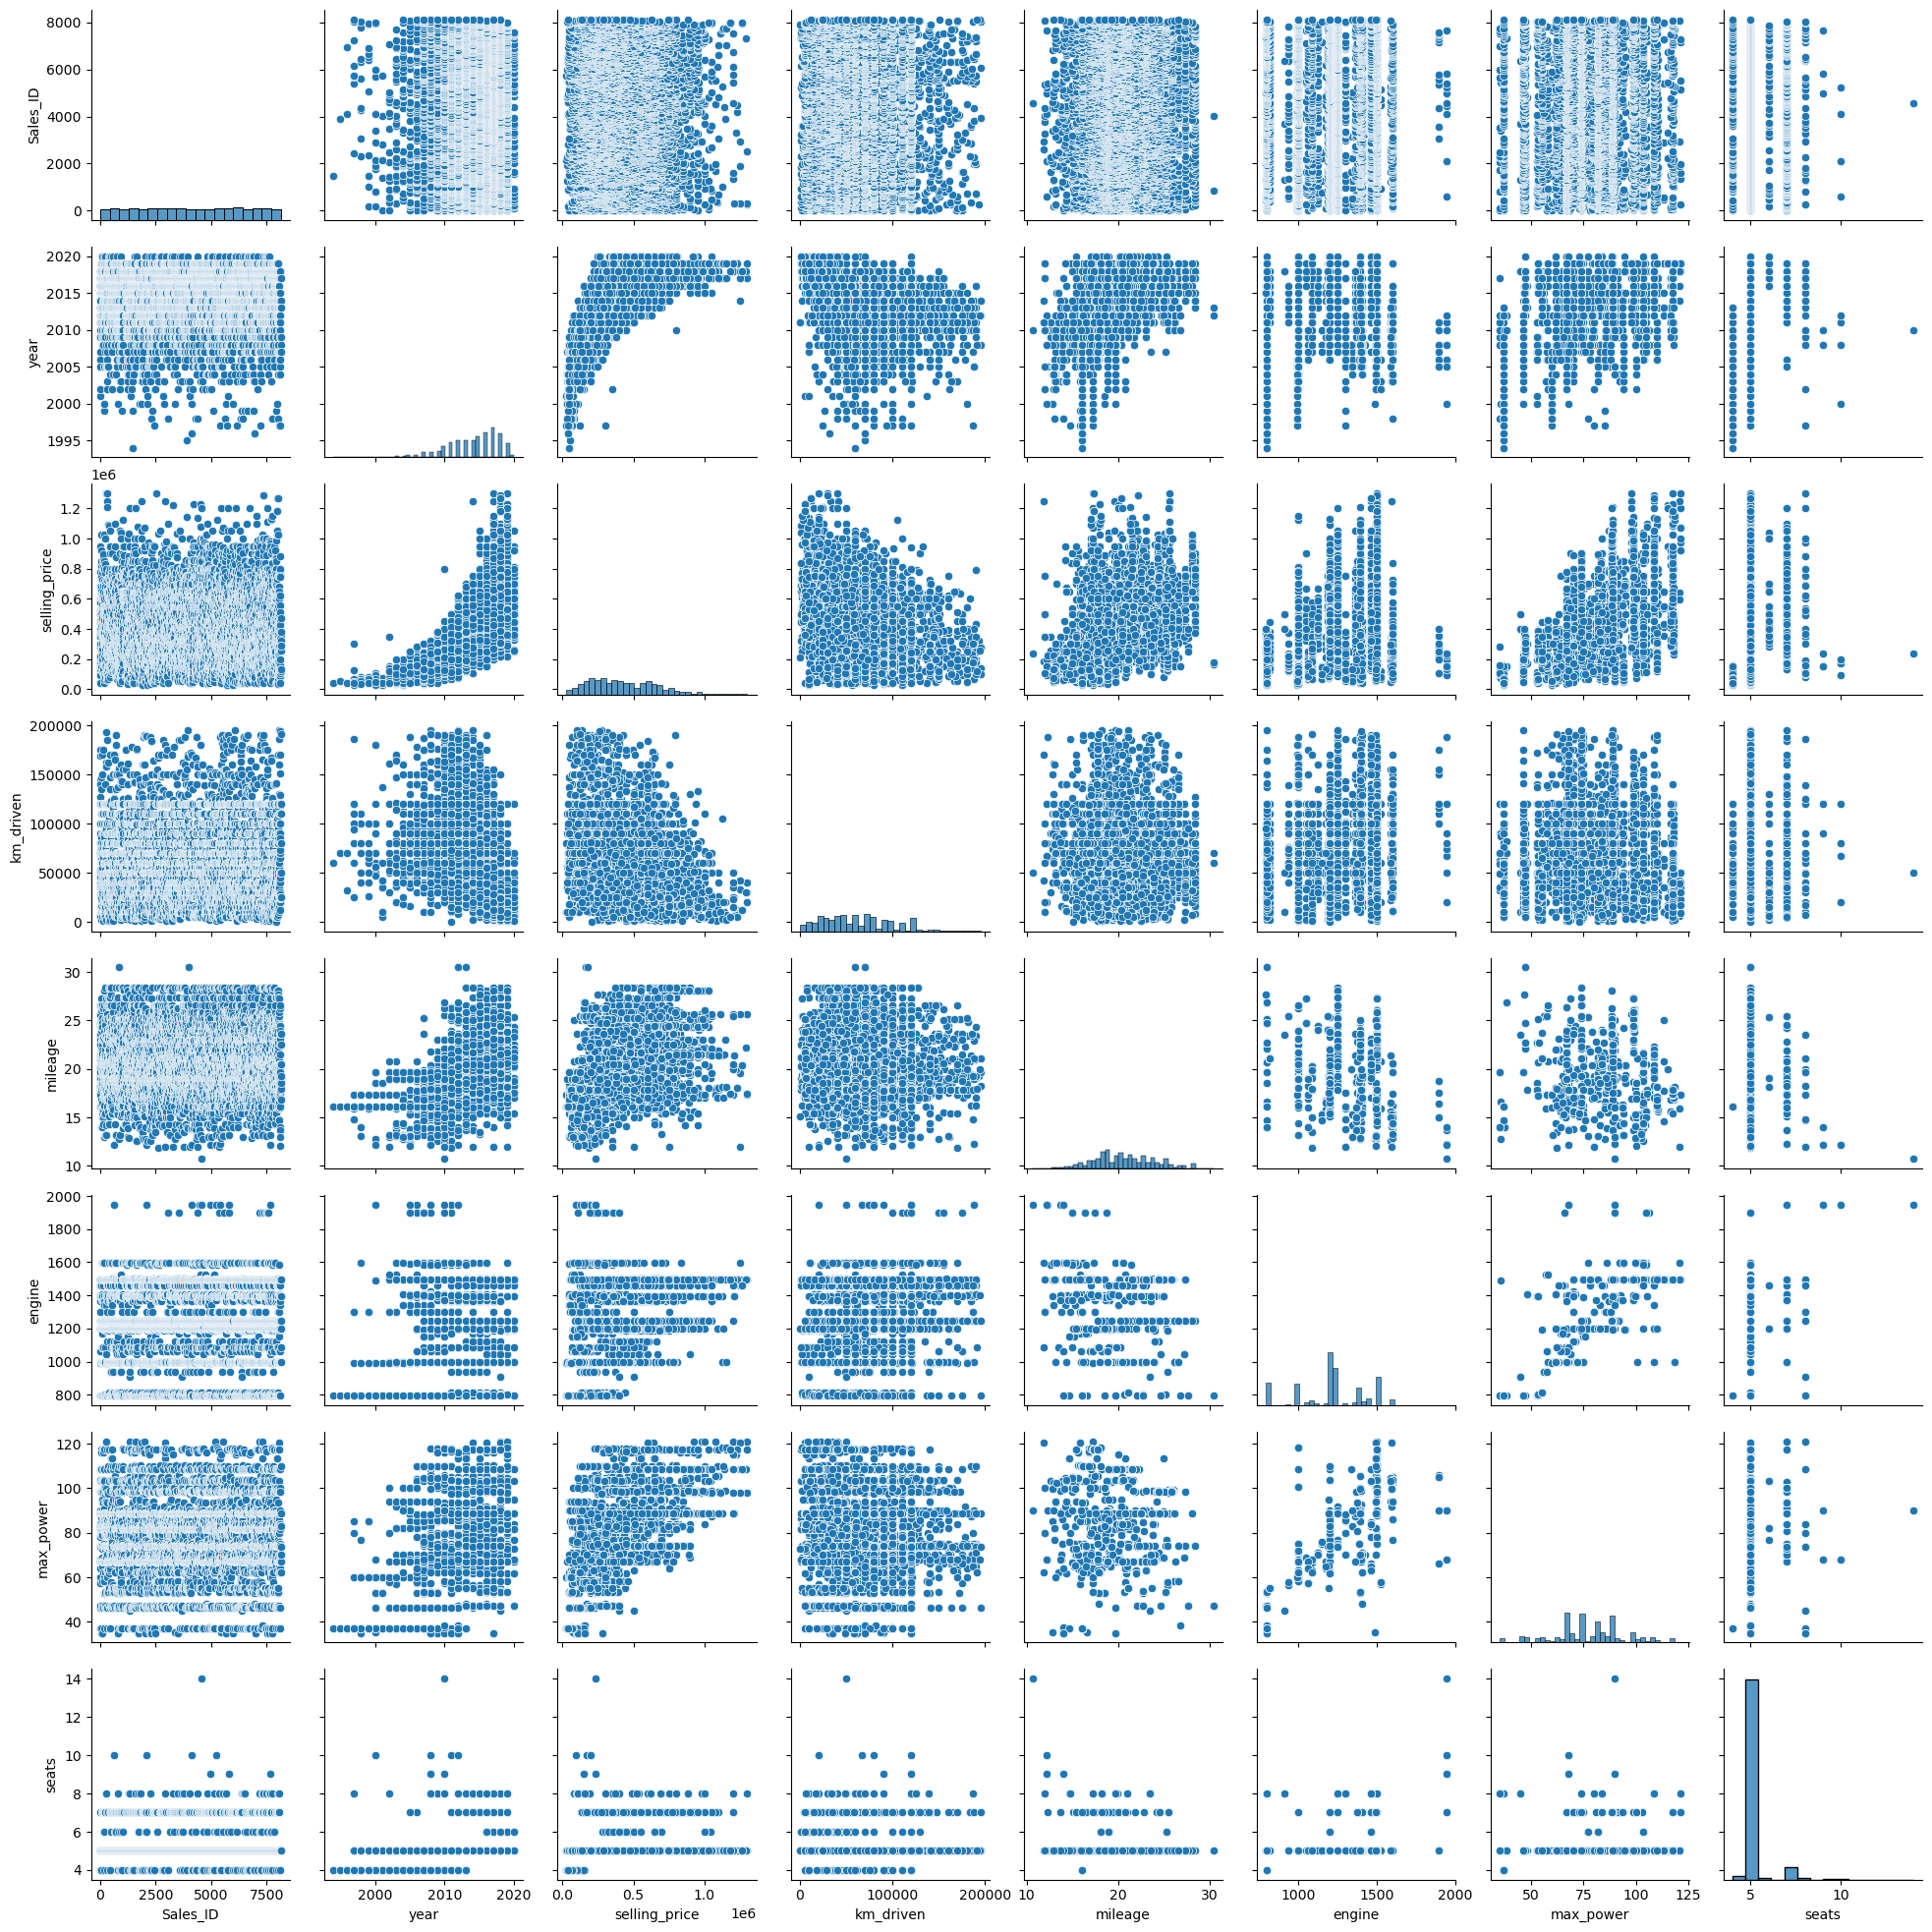

In [50]:
sns.pairplot(df)

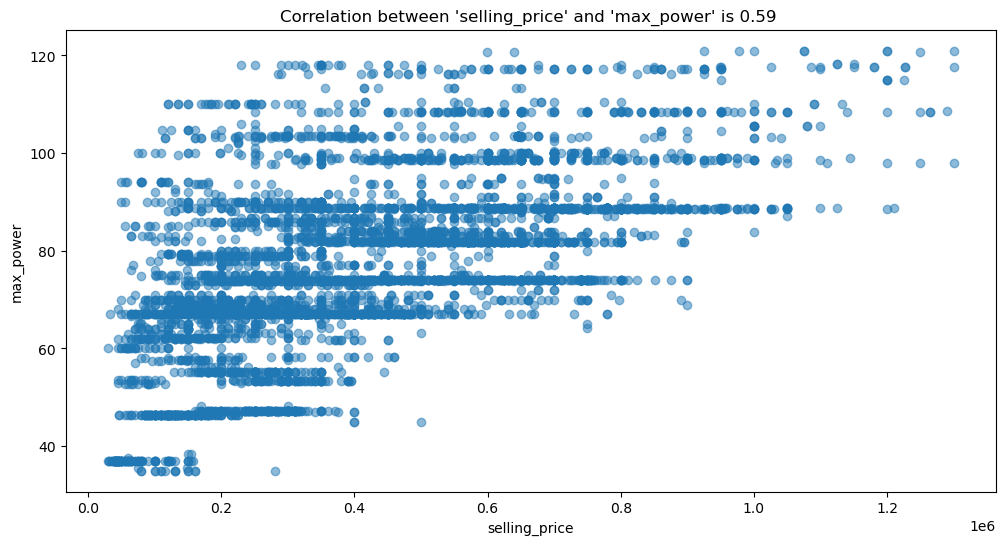

In [51]:
plt.figure(figsize=[12,6])
sns.regplot(data=df,x='selling_price',y='max_power',scatter_kws={'alpha':0.5},fit_reg=False)
plt.title(f"Correlation between 'selling_price' and 'max_power' is 0.59 ")
plt.show()

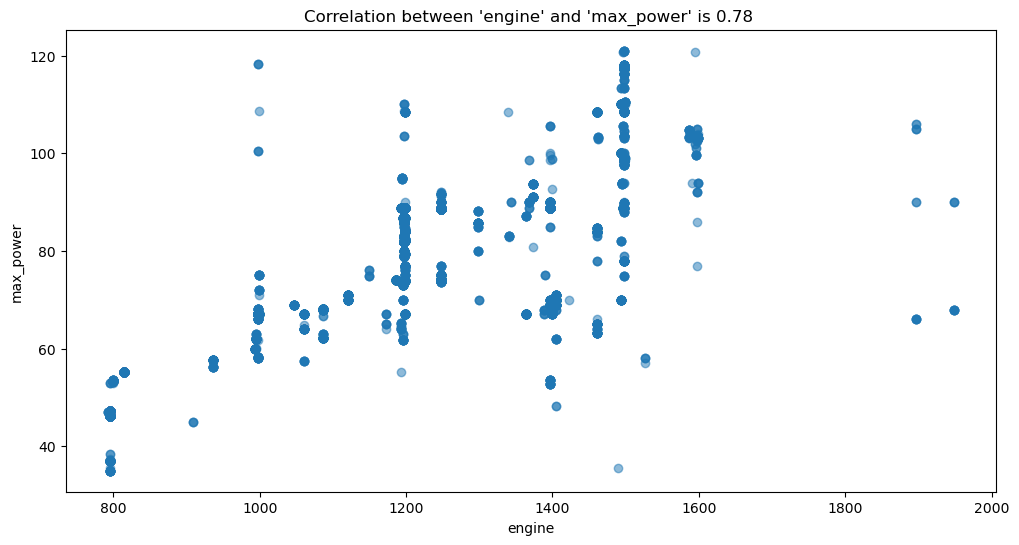

In [52]:
plt.figure(figsize=[12,6])
sns.regplot(data=df,x='engine',y='max_power',scatter_kws={'alpha':0.5},fit_reg=False)
plt.title(f"Correlation between 'engine' and 'max_power' is 0.78 ")
plt.show()

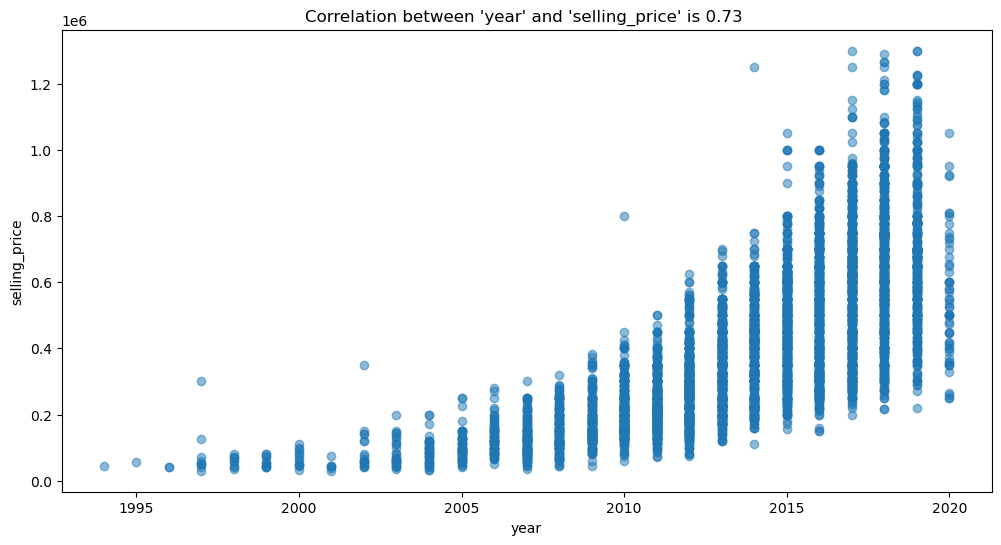

In [53]:
plt.figure(figsize=[12,6])
sns.regplot(data=df,x='year',y='selling_price',scatter_kws={'alpha':0.5},fit_reg=False)
plt.title(f"Correlation between 'year' and 'selling_price' is 0.73 ")
plt.show()

Inferences:
    
1.Really positive high correlation between selling price and max power (0.59).

2.High positive Correlation between year and selling price(0.73).

3.High positive correlation between engine and max power(0.78).    

## Exploring numerical features against categorical features

<Figure size 1000x1000 with 0 Axes>

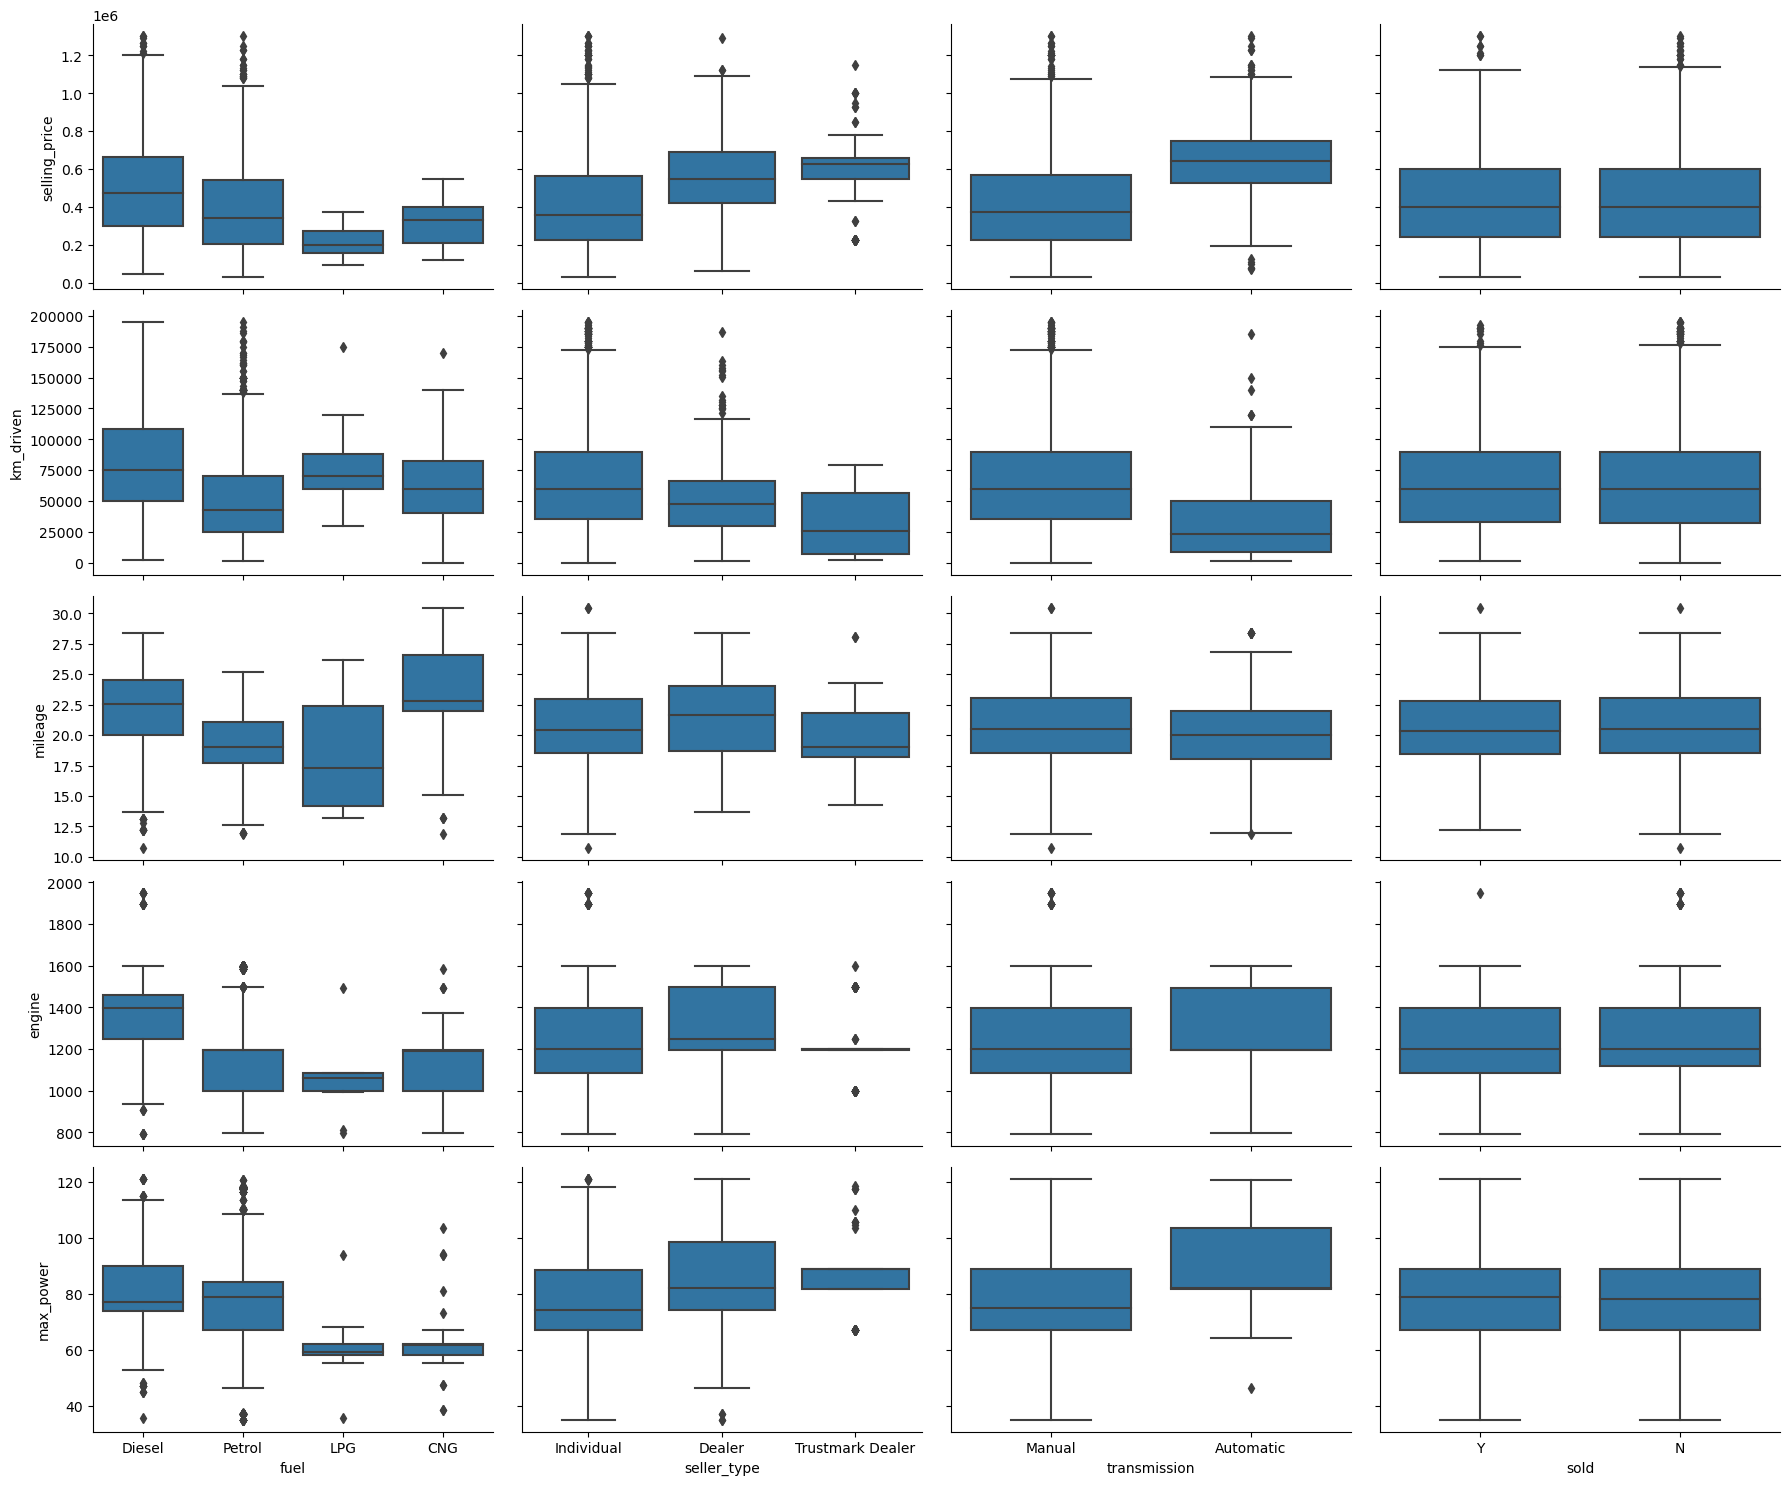

In [54]:
categorical_features=[ 'fuel', 'seller_type', 'transmission','sold']
ax=plt.figure(figsize = [10, 10])
g = sns.PairGrid(data = df, y_vars = ['selling_price','km_driven','mileage', 'engine', 'max_power'],
                 x_vars = categorical_features,height = 3, aspect = 1.5)
g.map(sns.boxplot,color=sns.color_palette()[0])
plt.show();

Inferences:

1. Automatic cars had higher max power,engine and selling price than manual cars.

## Relationships between 'sold' variable and other features

<AxesSubplot:title={'center':'year'}, xlabel='sold'>

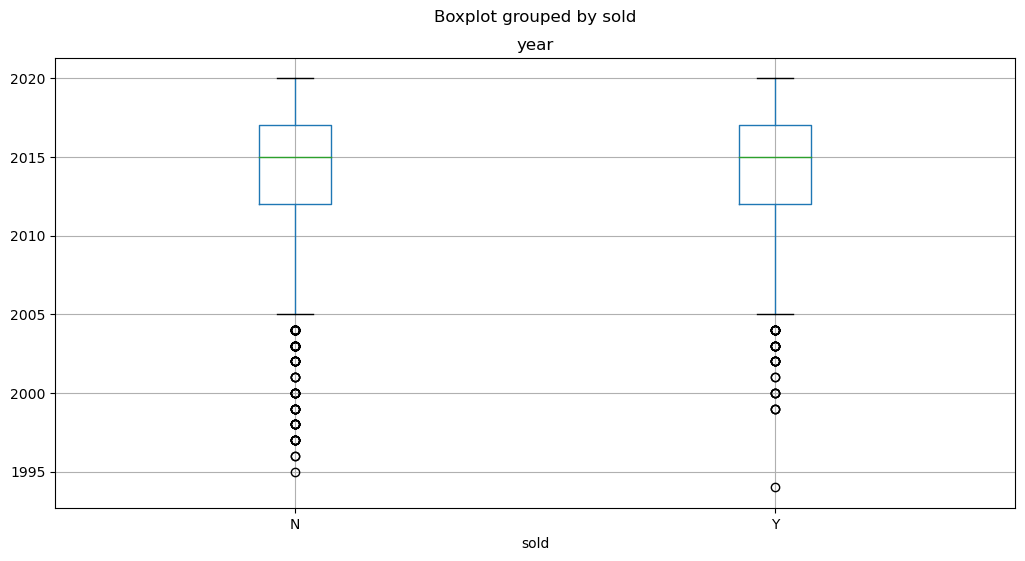

In [55]:
df.boxplot(column='year',by='sold',figsize=[12,6])

<AxesSubplot:title={'center':'selling_price'}, xlabel='sold'>

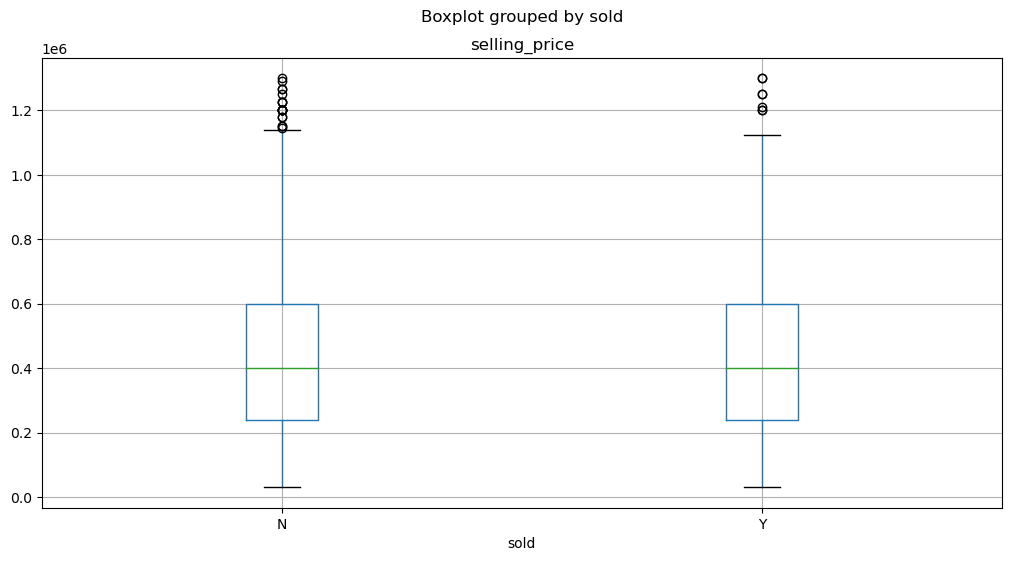

In [56]:
df.boxplot(column='selling_price',by='sold',figsize=[12,6])

<AxesSubplot:title={'center':'km_driven'}, xlabel='sold'>

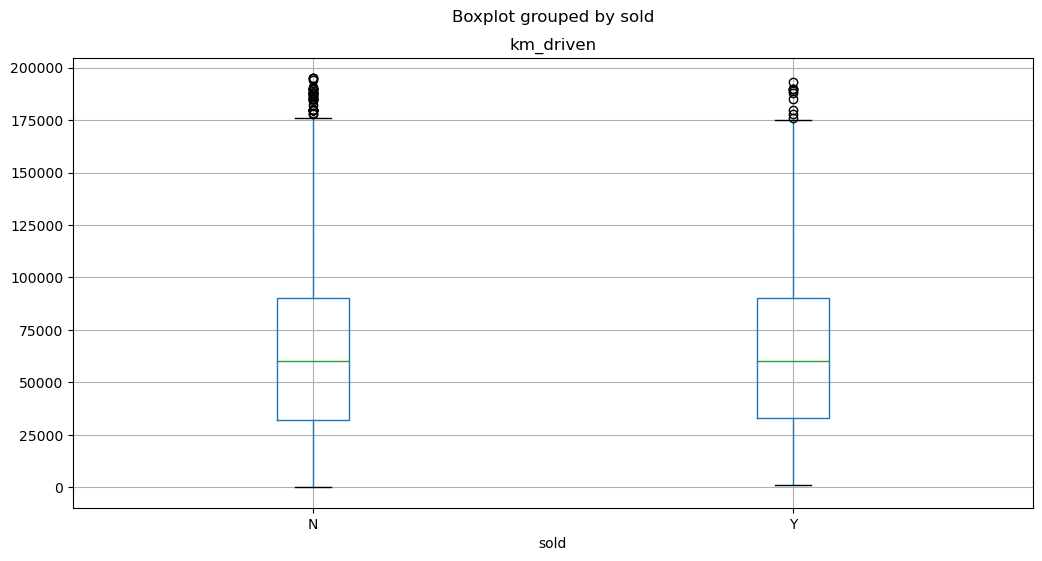

In [57]:
df.boxplot(column='km_driven',by='sold',figsize=[12,6])

<AxesSubplot:title={'center':'mileage'}, xlabel='sold'>

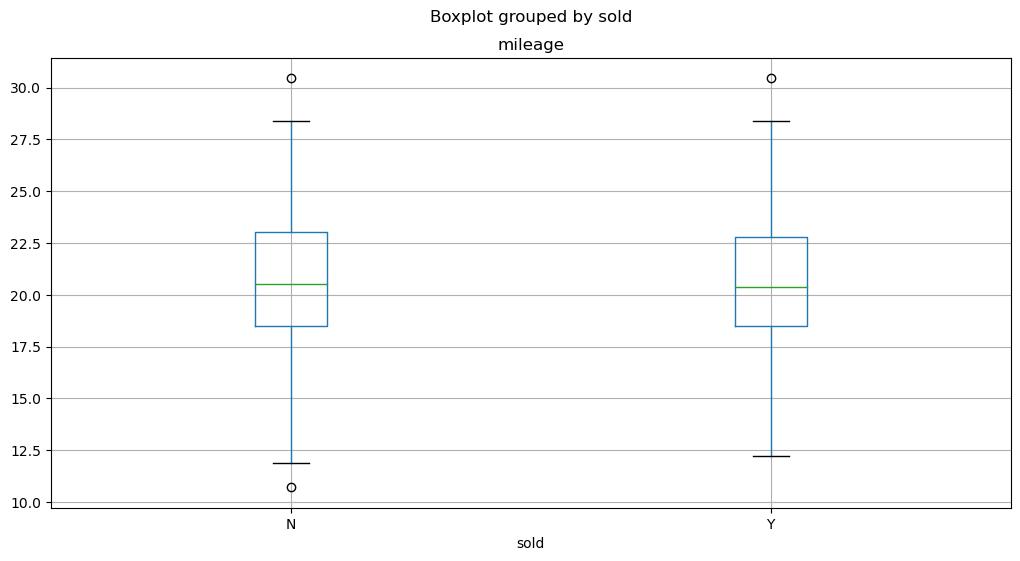

In [58]:
df.boxplot(column='mileage',by='sold',figsize=[12,6])

<AxesSubplot:title={'center':'engine'}, xlabel='sold'>

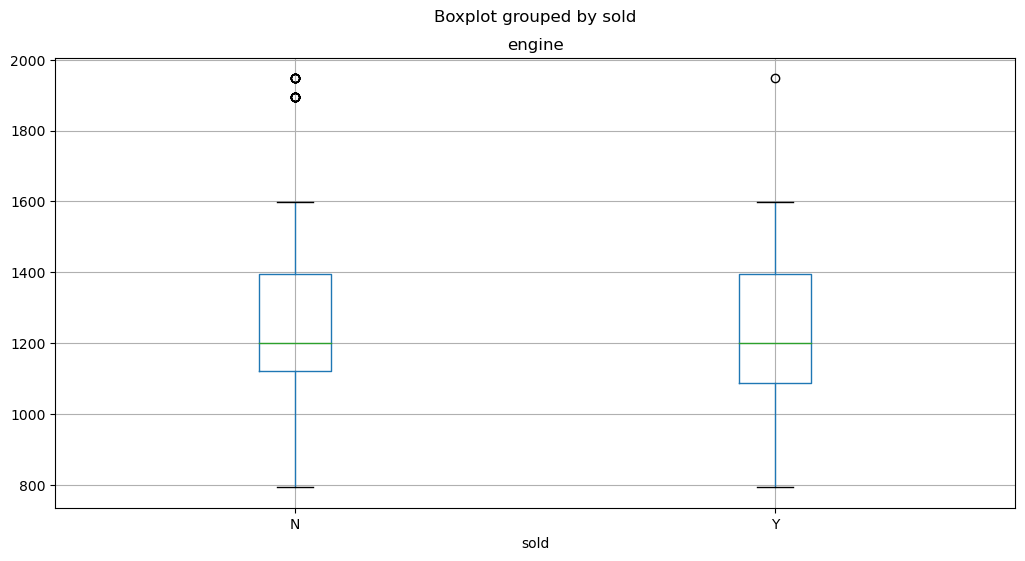

In [59]:
df.boxplot(column='engine',by='sold',figsize=[12,6])

<AxesSubplot:title={'center':'max_power'}, xlabel='sold'>

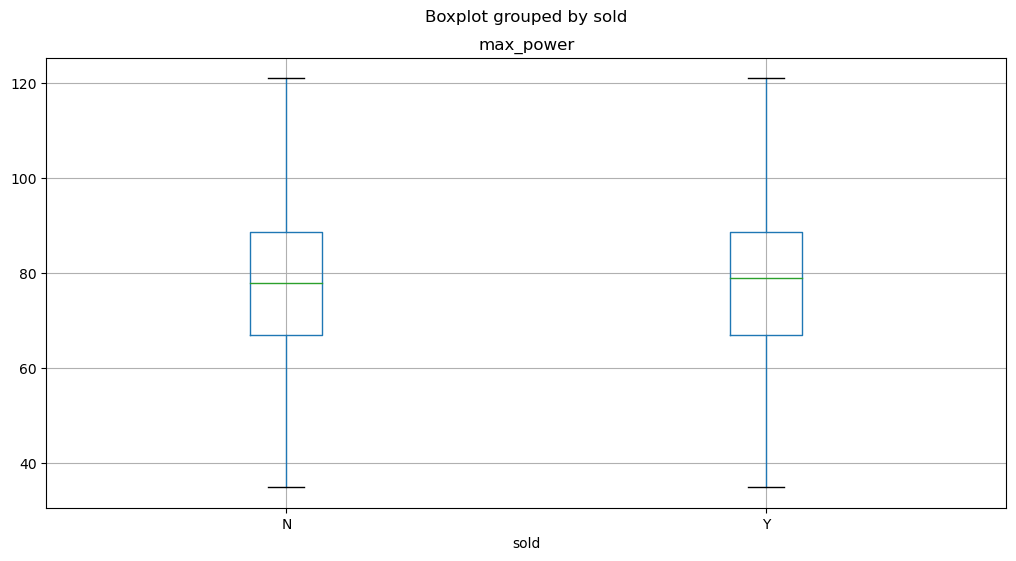

In [60]:
df.boxplot(column='max_power',by='sold',figsize=[12,6])

Inferences:

1. Cars sold tended to have lower selling prices than cars that have not been sold.

2. Higher Km_driven tended to be a characteristic of car not sold yet.

3. Higher mileage tended to be charactersistics of cars not yet sold. 

## Relationship between selling price and other variables

Text(0.5, 1.0, 'Selling Price vs year')

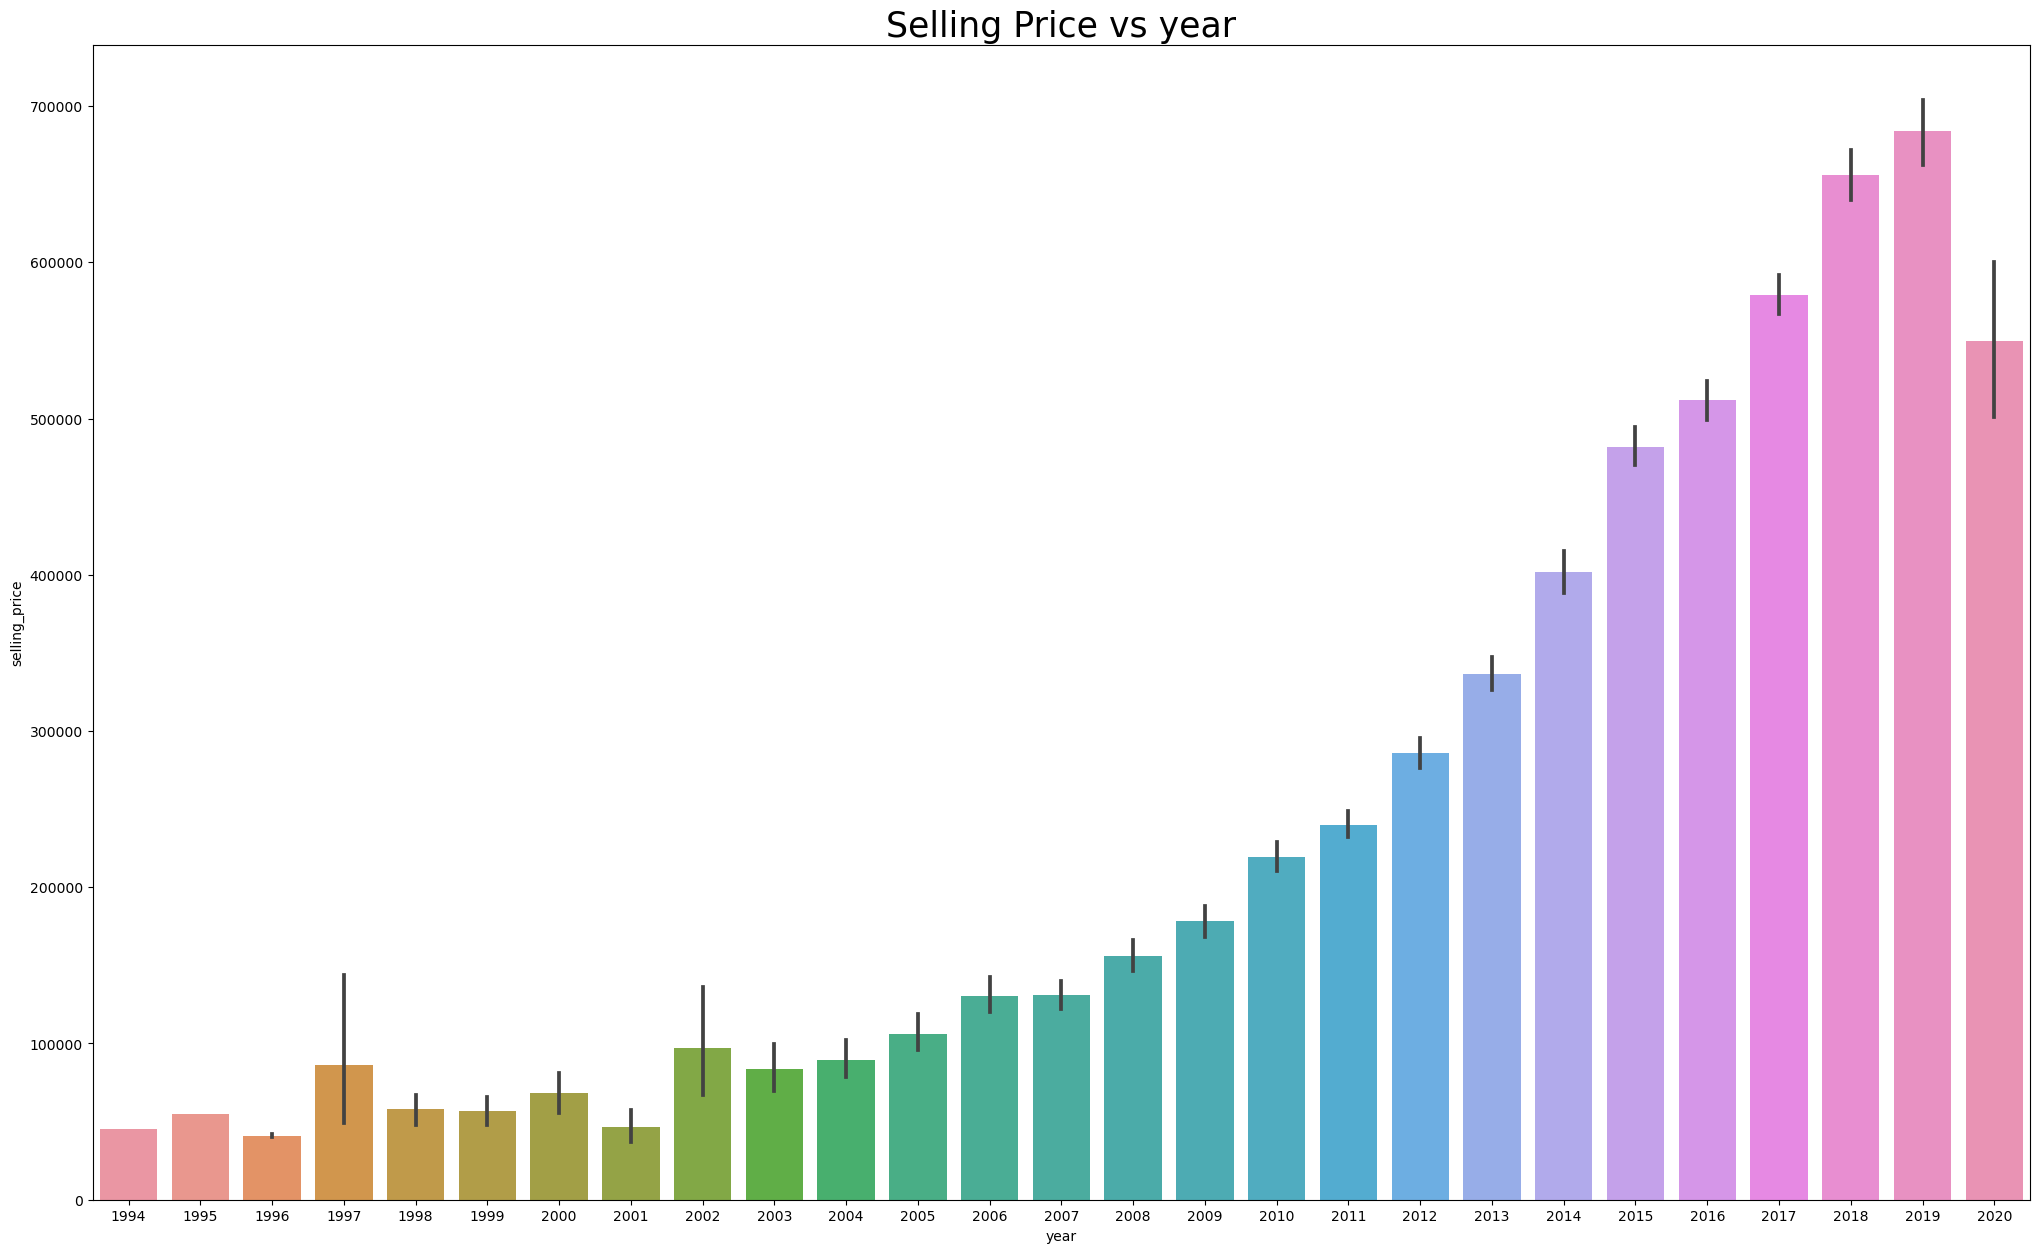

In [61]:
fig = plt.figure(figsize = (25,15))
sns.barplot(y = 'selling_price', x ='year', data  = df)
plt.title('Selling Price vs year',fontsize =25)

Text(0.5, 1.0, 'Selling Price vs name')

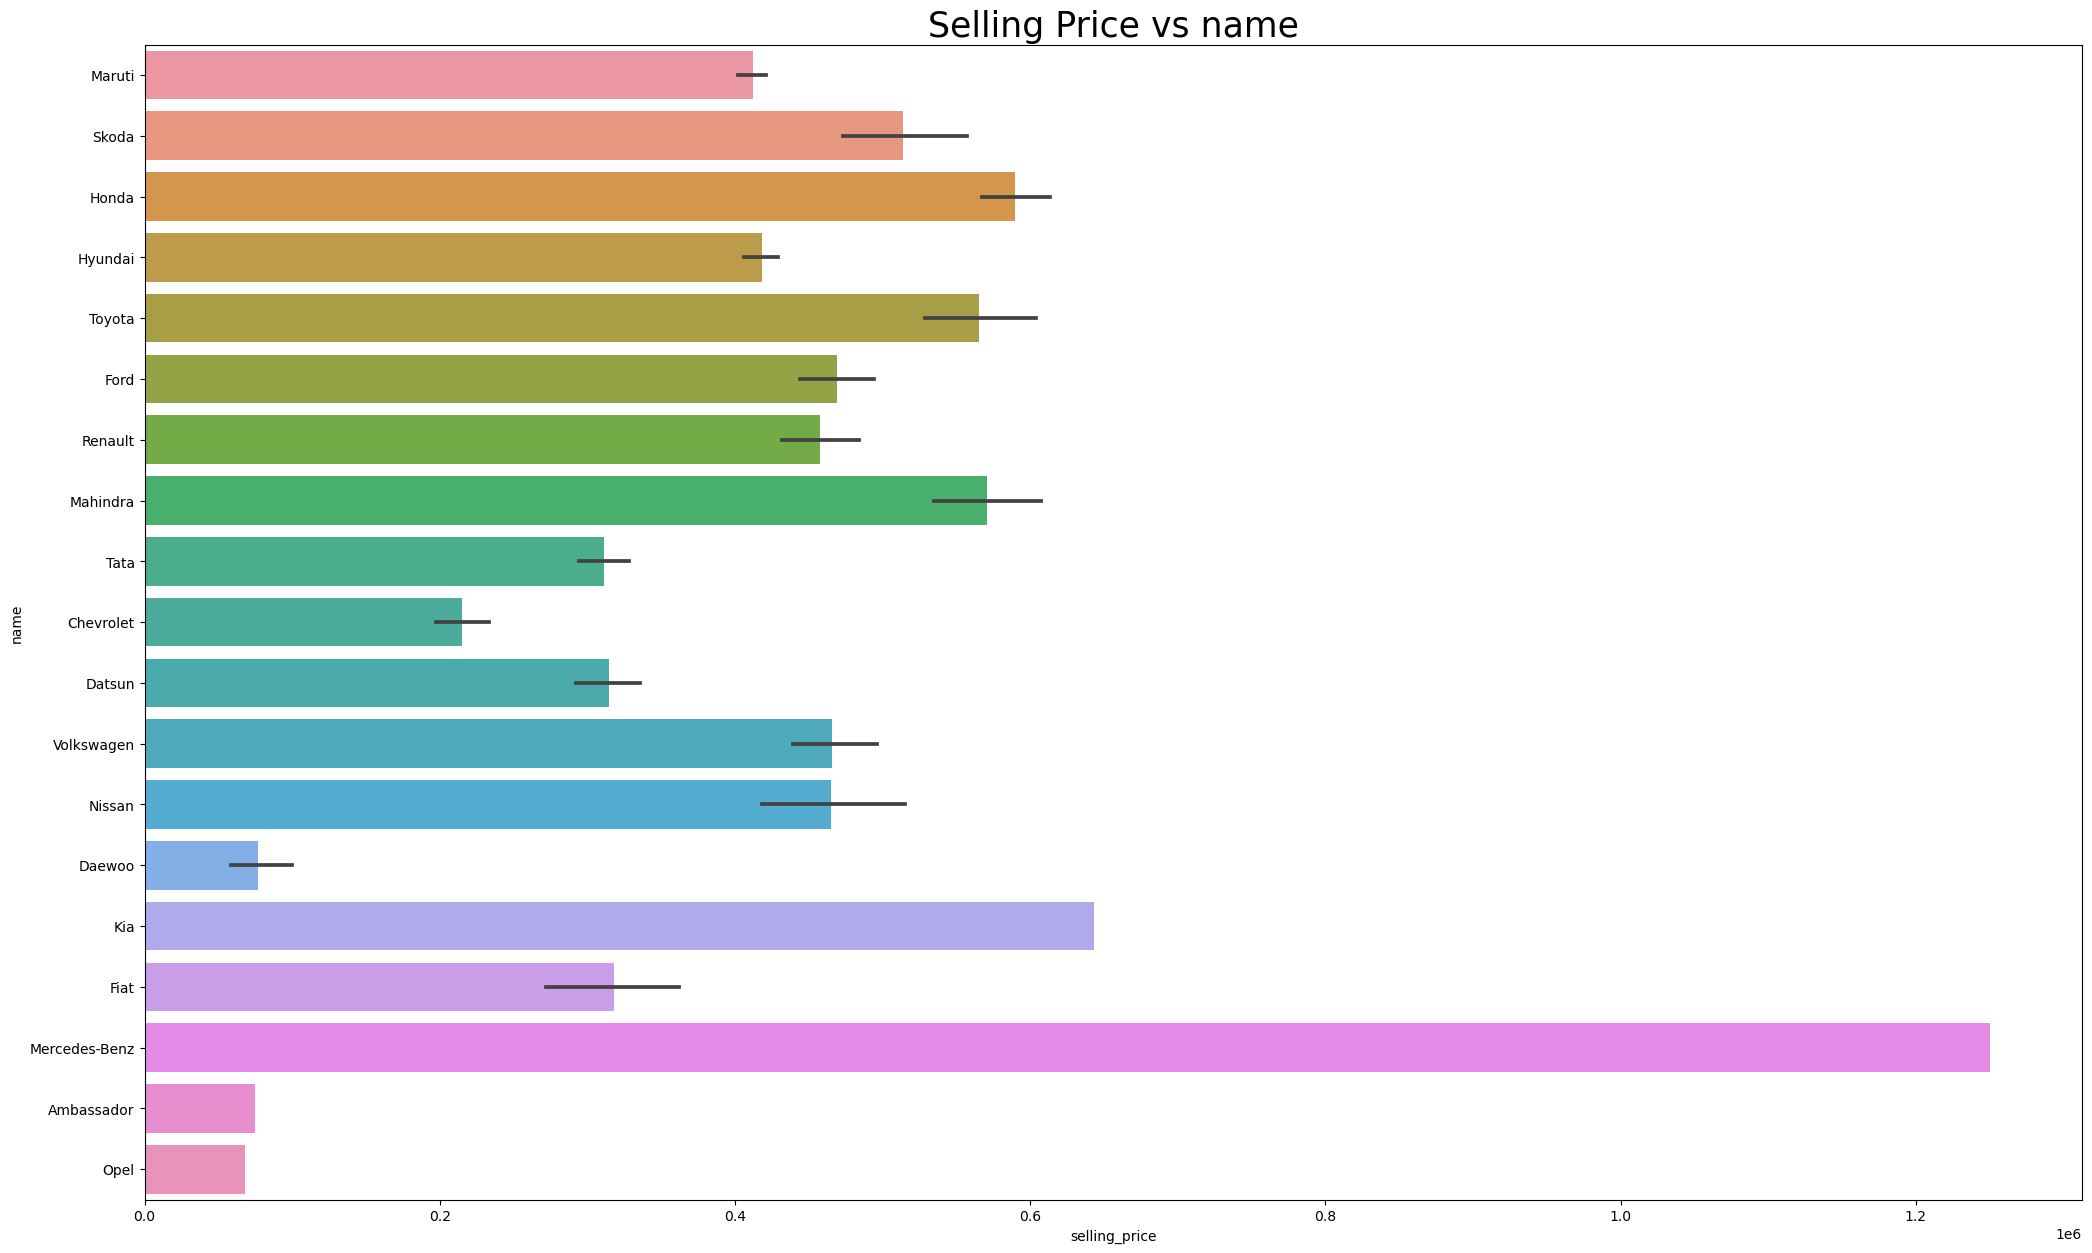

In [62]:
fig = plt.figure(figsize = (25,15))
sns.barplot(x = 'selling_price', y ='name', data  = df)
plt.title('Selling Price vs name',fontsize =25)


Text(0.5, 1.0, 'Count of cars of a Brand')

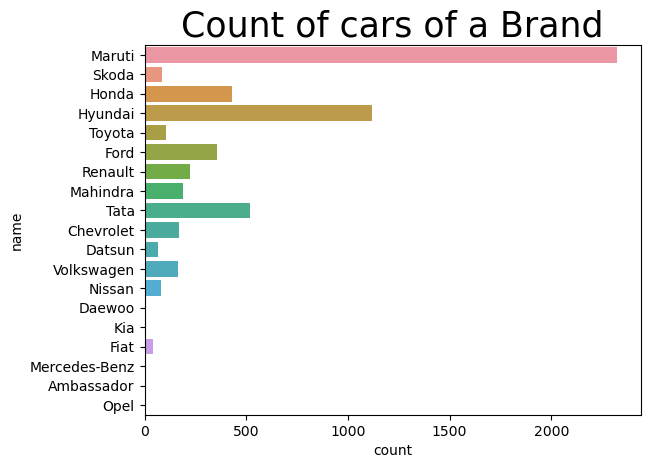

In [63]:
sns.countplot(y ='name', data  = df)
plt.title('Count of cars of a Brand',fontsize  =25)

Text(0.5, 1.0, 'Price vs Fuel')

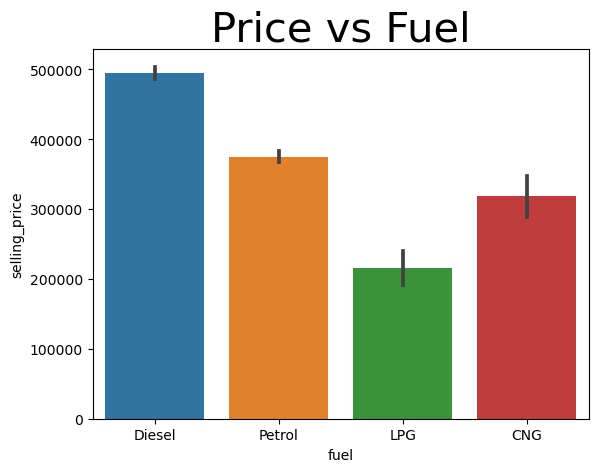

In [64]:
sns.barplot(x = 'fuel', y = 'selling_price', data  = df)
plt.title('Price vs Fuel',fontsize  =30)


Text(0.5, 1.0, 'Price vs Transmission')

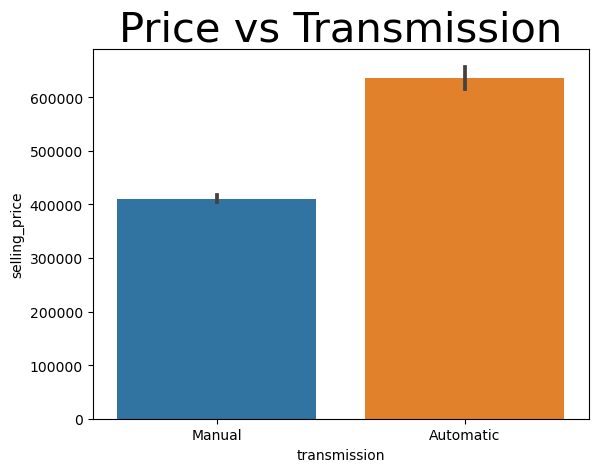

In [65]:
sns.barplot(x ='transmission', y ='selling_price', data  = df)
plt.title('Price vs Transmission',fontsize  =30)

Text(0.5, 1.0, 'Price vs Owner ')

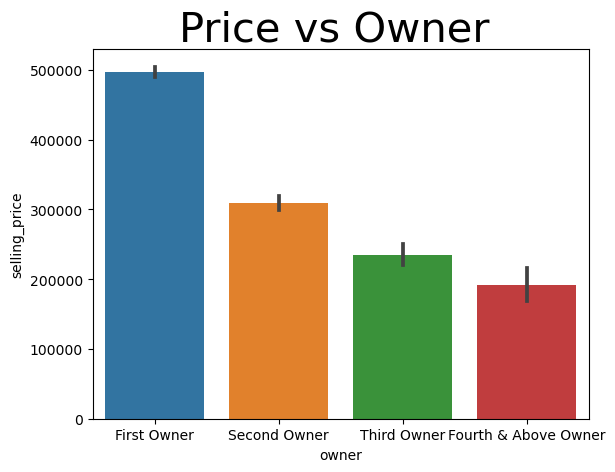

In [66]:
sns.barplot(x ='owner', y ='selling_price', data  = df)
plt.title('Price vs Owner ',fontsize  =30)

Inferences:

1.The Price of cars increases gradually year by year.

2.The Highest price of car is MercedesBenz and lowest price of car is Maruti and thus the highest number of cars owned by    people is of brand Maruti.

3.Price of Diesel and Petrol type of cars is highest, while CNG and LPG car type prices are lowest.

4.Price of  Automatic cars have higher prices than Manual type.

5.As the number of owner of a car increases the price of that car decreases.

Condition for high price car :-

1.Should be diesel or petrol.

2.Automatic in trasmission.

3.Should be a New car or atleats a second-hand car.

## Multivariate Exploration

Text(0.5, 1.0, "Distribution of 'sold' in 'transmission' and 'selling_price'")

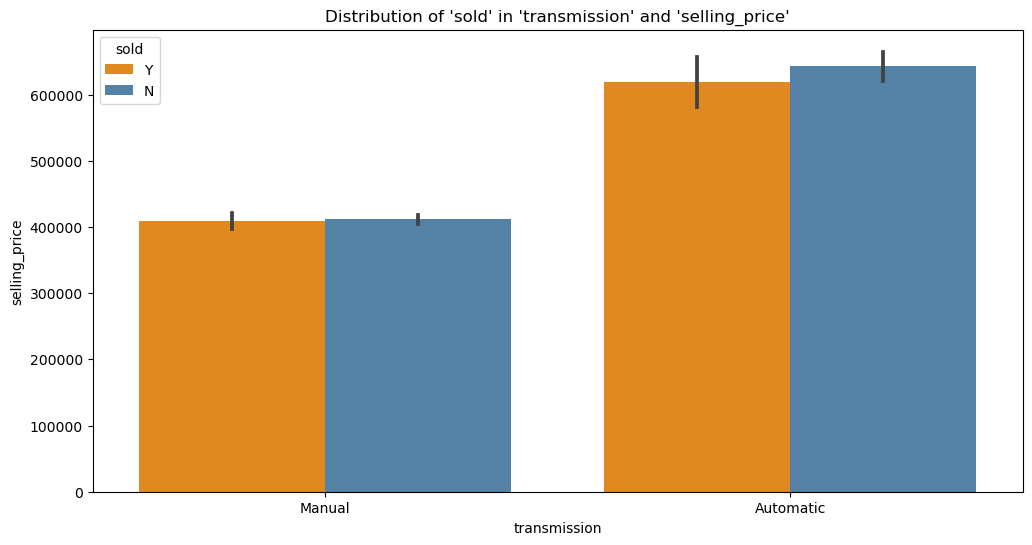

In [67]:
plt.figure(figsize=[12,6])
sns.barplot(data=df,x='transmission',y='selling_price',hue='sold',palette=['darkorange','steelblue'])
plt.title(f"Distribution of 'sold' in 'transmission' and 'selling_price'")

Inferences:
    
1.Automatic cars had higher selling price and the distribution of sold automatic cars were considerably expensive to that of not sold automatic cars. 

2.Manual cars tended to be less expensive than automatic cars with almost equal distribution in the cars sold and not sold.    

Text(0.5, 1.0, "Distribution of 'sold' in 'year' and 'selling_price'")

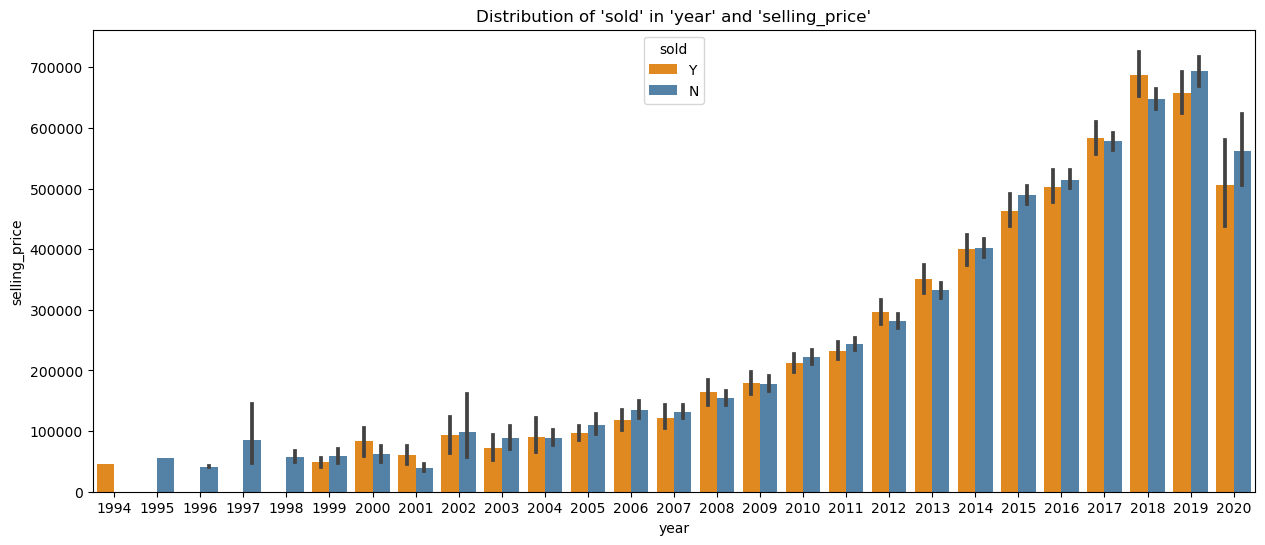

In [68]:
plt.figure(figsize=[15,6])
sns.barplot(data=df,x='year',y='selling_price',hue='sold',palette=['darkorange','steelblue'],orient='v')
plt.title(f"Distribution of 'sold' in 'year' and 'selling_price'")

Inferences:
    
1. Selling prices increased across the years cars purchased from 1995 to 1998 had a hard time being sold

Text(0.5, 1.0, "Distribution of 'transmission' in 'year' and 'engine'")

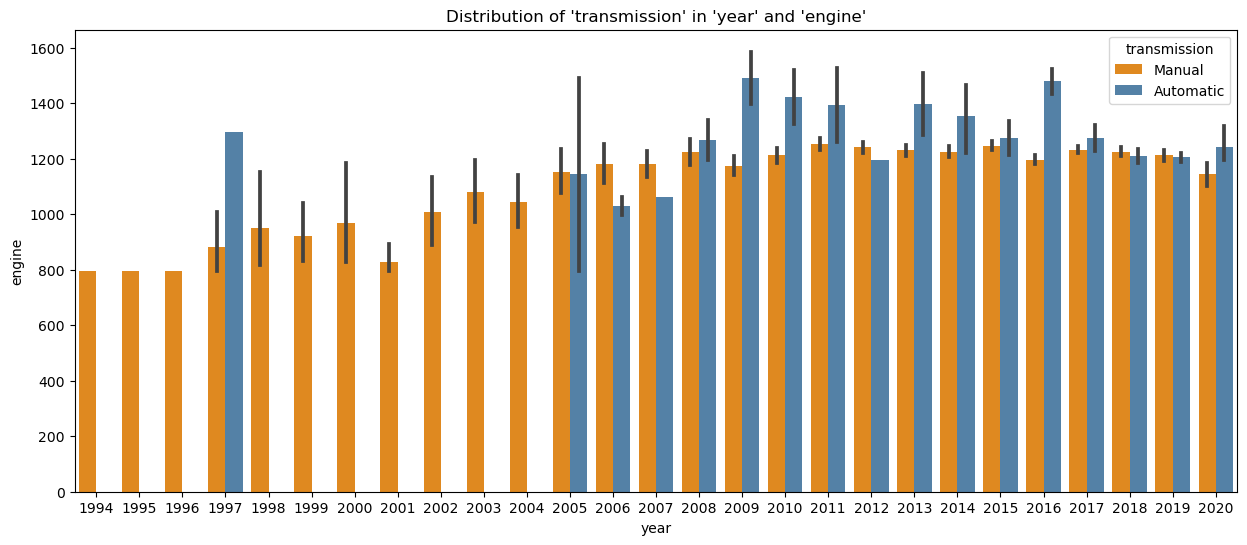

In [69]:
plt.figure(figsize=[15,6])
sns.barplot(data=df,x='year',y='engine',hue='transmission',palette=['darkorange','steelblue'],orient='v')
plt.title(f"Distribution of 'transmission' in 'year' and 'engine'")

Text(0.5, 1.0, "Distribution of 'transmission' in 'fuel' and 'selling_price'")

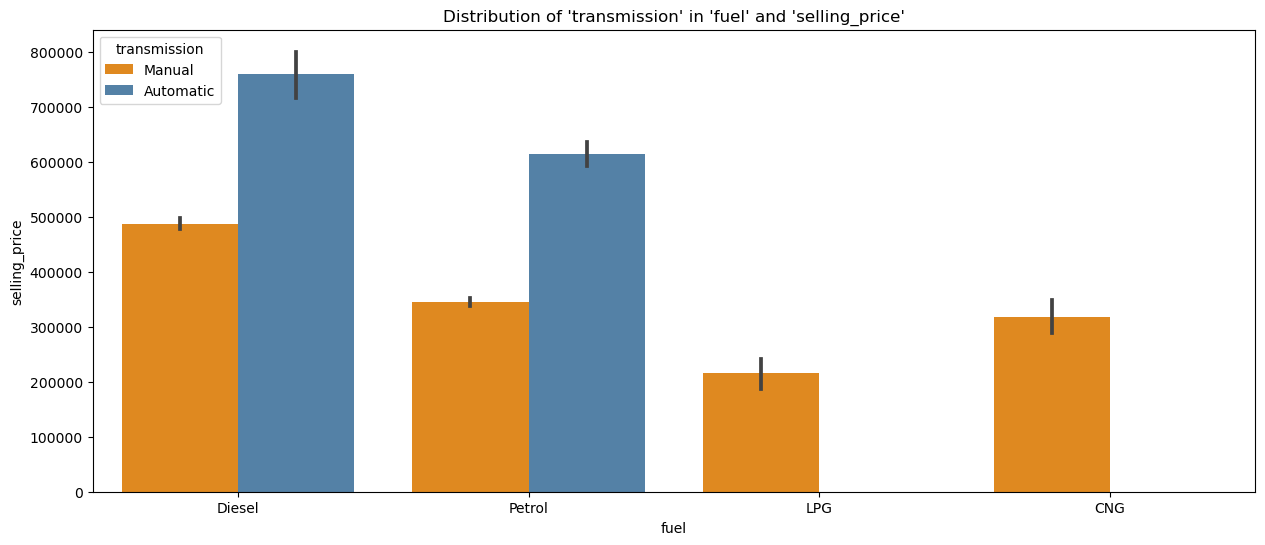

In [70]:
plt.figure(figsize=[15,6])
sns.barplot(data=df,x='fuel',y='selling_price',hue='transmission',palette=['darkorange','steelblue'])
plt.title(f"Distribution of 'transmission' in 'fuel' and 'selling_price'")

<AxesSubplot:xlabel='transmission', ylabel='selling_price'>

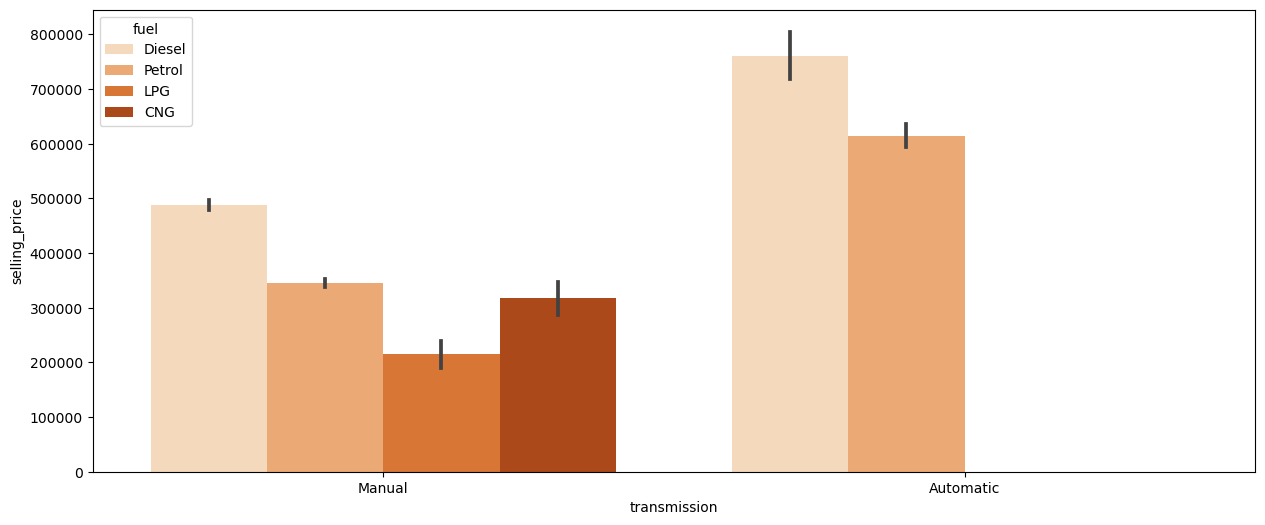

In [71]:
plt.figure(figsize=[15,6])
sns.barplot(data=df,x='transmission',y='selling_price',hue='fuel',palette='Oranges')

Inferences:

1.Diesel and petrol operated cars had more automatic cars than manual cars, LPG and CNG operated cars had only manual cars

2.Diesel Operated cars tended to be more expensive than other type of fuel operated cars.

3.The max engine power and engine power of automatic cars were very high if compared to that of manual cars.


## Categorical features that affect used car price

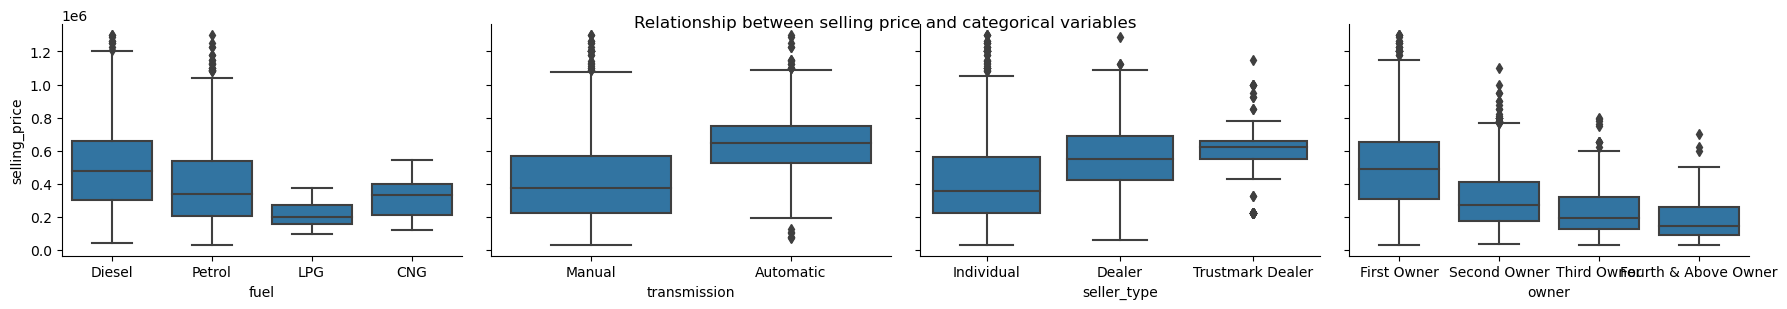

In [72]:
features=[ 'fuel', 'transmission','seller_type','owner']

cat_feature = sns.PairGrid(data = df, y_vars = ['selling_price'], x_vars = features,
                height = 3, aspect = 1.5)
cat_feature.map(sns.boxplot,color=sns.color_palette()[0])
plt.suptitle('Relationship between selling price and categorical variables')
plt.show();

Inferences

1. Diesel and Petrol fuelled used cars tended to have higher prices than LPG and CNG fuelled cars. 

2. Automatic cars in the dataset were more expensive as compared to manual cars.Indivividual cars tended to have lesser prices than dealer used cars. 

3. First owner cars were more expensive than other owner types.
    

## Numerical features that affect used car price

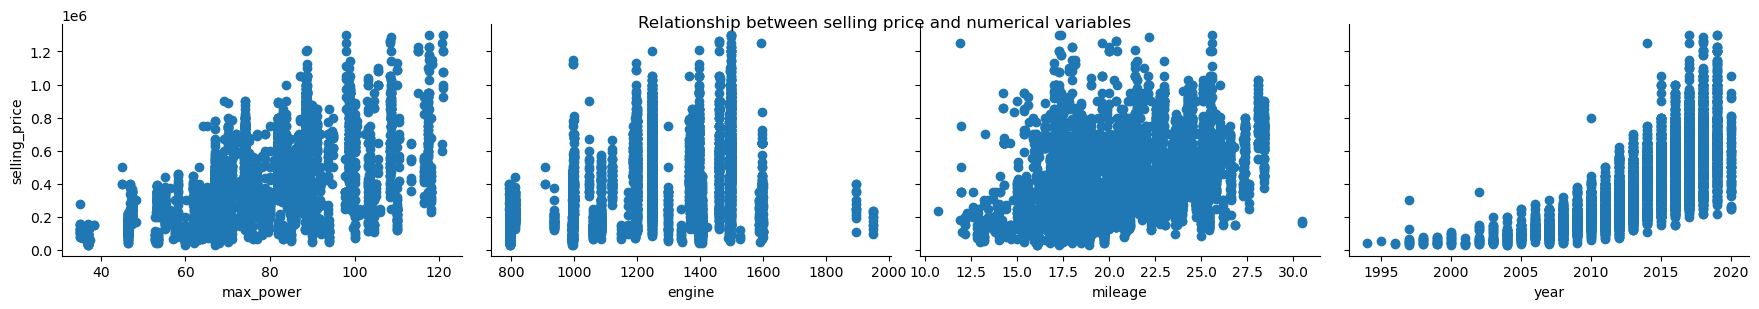

In [73]:
features=[ 'max_power','engine','mileage','year']

num_features = sns.PairGrid(data = df, y_vars = ['selling_price'], x_vars = features,
                height = 3, aspect = 1.5)
num_features.map(plt.scatter,color=sns.color_palette()[0])
plt.suptitle('Relationship between selling price and numerical variables')
plt.show();

Inferences:

1. Very high max engine powers had very high selling prices showing its correlation.Similarly, engine and years also show positive correlation with the selling price.
    

## Numerical features that affect used car getting sold or not

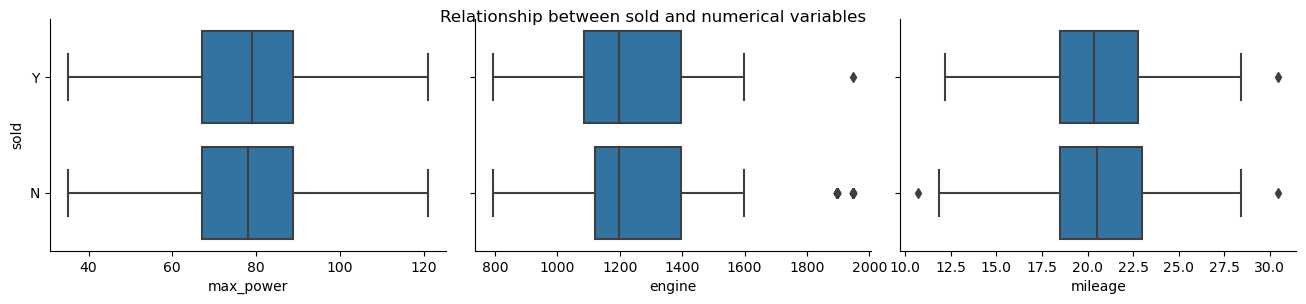

In [74]:
features=[ 'max_power','engine','mileage']

num_sold = sns.PairGrid(data = df, y_vars = ['sold'], x_vars = features,
                height = 3, aspect = 1.5)
num_sold.map(sns.boxplot,color=sns.color_palette()[0])
plt.suptitle('Relationship between sold and numerical variables')
plt.show();

Inferences:

1. Cars with higher mileage had a harder time getting sold than cars with lower mileage

## Categorical features that affect used car getting sold or not

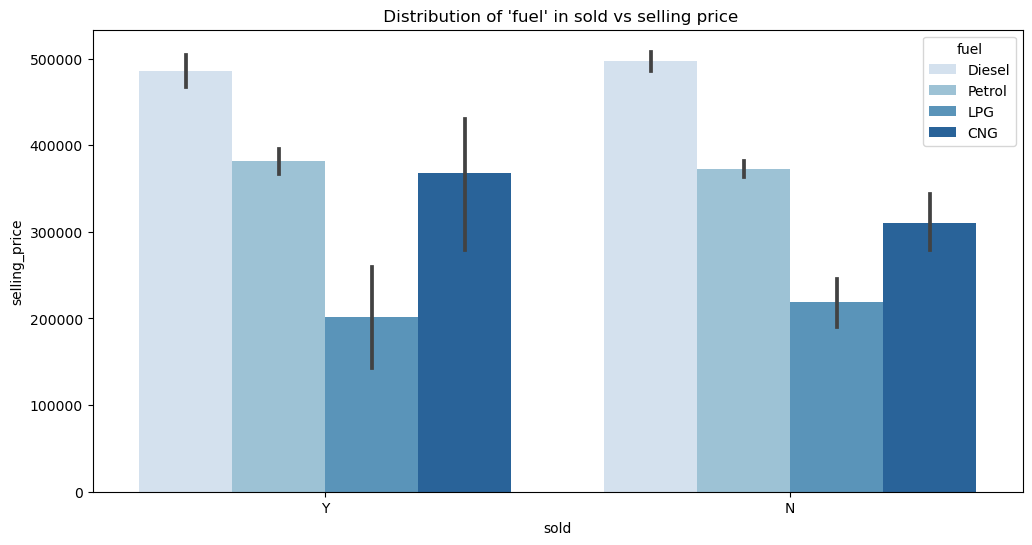

In [75]:
plt.figure(figsize=[12,6])
sns.barplot(data=df,x="sold",y="selling_price",hue='fuel',palette="Blues")
plt.title(f" Distribution of 'fuel' in sold vs selling price")
plt.show()

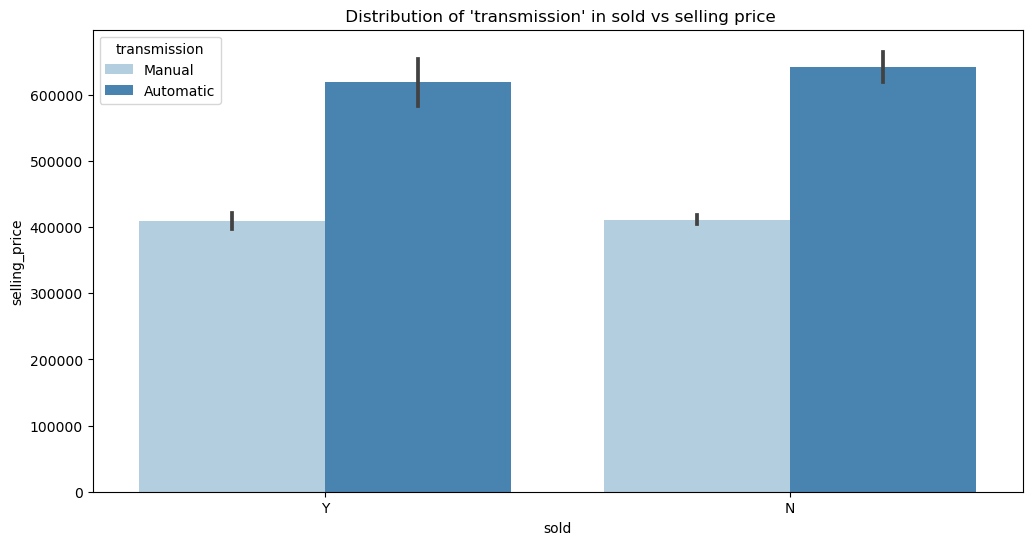

In [76]:
plt.figure(figsize=[12,6])
sns.barplot(data=df,x="sold",y="selling_price",hue='transmission',palette="Blues")
plt.title(f" Distribution of 'transmission' in sold vs selling price")
plt.show()

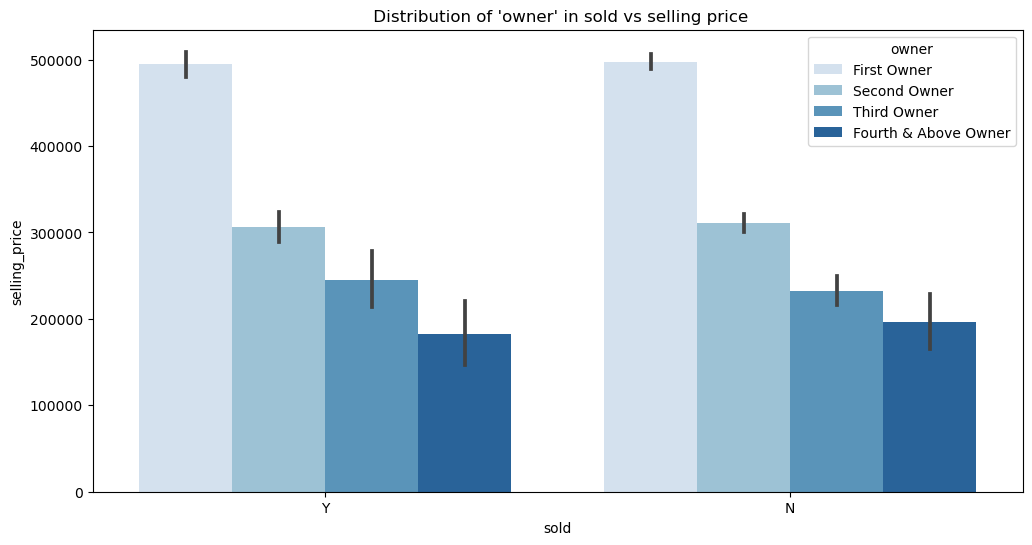

In [77]:
plt.figure(figsize=[12,6])
sns.barplot(data=df,x="sold",y="selling_price",hue='owner',palette="Blues")
plt.title(f" Distribution of 'owner' in sold vs selling price")
plt.show()

Inferences:

1.Diesel and petrol fuelled cars had a higher chance of selling than LPG or CNG fuelled cars

## Summary of Findings 

1.Cars sold tended to have lower selling prices than cars that have not been sold. 

2.Higher Km_driven tended to be a characteristic of car not sold yet.

3Automatic cars had higher selling prices,selling price of vehicles increased as years and engine powers increased.

4.A positive correlation between selling price and max_power which is not surprising as more engine powers generally increase the value of a car.

5.One interesting relationship is the high positive correlation between engine and max power. 

6.Cars higher mileage tended to be charactersistics of cars not yet sold.

7.Diesel and Petrol cars had better engine powers than LPG and CNG fueled cars.

8.Engine power and max engine power is a great characteristic of very expensive cars. 

9.Automatic cars , especially diesel operated automatic cars tended to be very expensive. 

10.The max engine power and engine power of automatic cars were very high if compared to that of manual cars.

# Statistical Analysis

# Hypothesis Testing 

In [78]:
import scipy.stats as st

## Chi Square Test

Is the sold proportion is same for all the fuel ? pls verufy this claim @ 5% level of significance

In [79]:
df.sold.value_counts()

N    4405
Y    1472
Name: sold, dtype: int64

In [80]:
df.fuel.value_counts()

Petrol    3204
Diesel    2596
CNG         45
LPG         32
Name: fuel, dtype: int64

In [81]:
table = pd.crosstab(df.sold,df.fuel)
table

fuel  CNG  Diesel  LPG  Petrol
sold                          
N      39    1976   26    2364
Y       6     620    6     840

H0: There is no association b/w sold and fuel type

H1: There is an association b/w sold and fuel type

In [82]:
# critical value
st.chi2.isf(0.05,3)   #  alpha, dof

7.814727903251178

In [83]:
st.chi2_contingency(table)  #  statistics valve,p value,dof,expected value

(8.1758996075902,
 0.042512887397615044,
 3,
 array([[  33.72894334, 1945.78526459,   23.98502637, 2401.5007657 ],
        [  11.27105666,  650.21473541,    8.01497363,  802.4992343 ]]))

Since chi square value(8.17) > chi critical value(7.81) so Reject H0

Is the sold proportion is same for all the region ? pls verufy this claim @ 5% level of significance

In [84]:
df.Region.value_counts()

Central    1771
West       1458
East       1451
South      1197
Name: Region, dtype: int64

In [85]:
table = pd.crosstab(df.sold,df.Region)
table

Region  Central  East  South  West
sold                              
N          1375   975    960  1095
Y           396   476    237   363

H0: There is no association b/w sold and region

H1: There is an association b/w sold and region

In [86]:
# critical value
st.chi2.isf(0.05,3)   #  alpha, dof

7.814727903251178

In [87]:
st.chi2_contingency(table)  #  statistics valve,p value,dof,expected value

(70.90239392995663,
 2.7353438016377073e-15,
 3,
 array([[1327.42130339, 1087.57103965,  897.1898928 , 1092.81776417],
        [ 443.57869661,  363.42896035,  299.8101072 ,  365.18223583]]))

Since chi square value > chi critical value(7.81) so Reject H0

Is the sold proportion is same for all the owner ? pls verufy this claim @ 5% level of significance

In [93]:
df.owner.value_counts()

First Owner             3896
Second Owner            1476
Third Owner              387
Fourth & Above Owner     118
Name: owner, dtype: int64

In [94]:
table = pd.crosstab(df.sold,df.owner)
table

owner  First Owner  Fourth & Above Owner  Second Owner  Third Owner
sold                                                               
N             2919                    79          1111          296
Y              977                    39           365           91

H0: There is no association b/w sold and owner

H1: There is an association b/w sold and owner

In [95]:
# critical value
st.chi2.isf(0.05,3)   #  alpha, dof

7.814727903251178

In [96]:
st.chi2_contingency(table)  #  statistics valve,p value,dof,expected value

(4.592284162043506,
 0.20420498539664714,
 3,
 array([[2920.17696103,   88.44478475, 1106.3093415 ,  290.06891271],
        [ 975.82303897,   29.55521525,  369.6906585 ,   96.93108729]]))

Since chi square value(4.59) > chi critical value(7.81)------> so fail to Reject H0

## 2 sample indepenent t test

In [89]:
df.groupby('transmission')['selling_price'].describe()

count           mean            std      min       25%  \
transmission                                                            
Automatic      413.0  636358.336562  202892.941631  75000.0  525000.0   
Manual        5464.0  410692.413799  227045.199860  29999.0  225000.0   

                   50%       75%        max  
transmission                                 
Automatic     645000.0  750000.0  1300000.0  
Manual        375000.0  570000.0  1300000.0

## Assumption test: Alpha=5% =0.05

1. normality test is not required Asda sample size are > 30

2. Variance equality test to be tested - use levence test


H0: pop variance_automatic = pop variance_manual  

H1: pop variance_automatic  != pop variance_manual  

In [91]:
ltb=df[df.transmission=='Automatic']['selling_price']
dtb=df[df.transmission=='Manual']['selling_price']

In [92]:
st.levene(ltb,dtb)

LeveneResult(statistic=33.650578843312324, pvalue=6.939398852439552e-09)

p value (0.0000069)< alpha(0.05) --> reject H0

Variance equality test has been faied so we have to use non parametric tests.
